In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Baseline: linear regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📌 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_1.csv')

# 📌 2. 定义评估函数
def evaluate_model(model, X, y, stratify, label="Model", n_splits=5, seeds=[91,22,67,2025,623]):
    rmse_scores, mae_scores, r2_scores = [], [], []
    for seed in seeds:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for train_idx, val_idx in skf.split(X, stratify):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
            mae_scores.append(mean_absolute_error(y_val, y_pred))
            r2_scores.append(r2_score(y_val, y_pred))

    print(f"Baseline Evaluation for {label}")
    print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
    print(f"MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"R²   : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    # return rmse_scores, mae_scores, r2_scores

# 📌 3. 特征和分层
exclude = ['market_value_million','position','position_group']
X_train = df.drop(columns=exclude)
strata = df['position']

# 📌 4. Baseline Linear Regression
lr = LinearRegression()

# ✅ 使用原始 target
y_train = df['market_value_million']
evaluate_model(lr, X_train, y_train, strata, label="Market Value")



Baseline Evaluation for Market Value
RMSE: 6.5844 ± 0.6264
MAE : 3.4575 ± 0.0715
R²   : 0.4309 ± 0.0262


In [ ]:
# —— 1. 读取测试集 ——
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_2.csv')

# —— 3. 构造 X_test 和 y_test ——
X_test = test_df.drop(columns=exclude)
# 保证列顺序与训练时的 X 一致
X_test = X_test[X_train.columns]

y_test = test_df['market_value_million']

# —— 4. 在测试集上预测并评估 ——
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test  = mean_absolute_error(y_test, y_pred)
r2_test   = r2_score(y_test, y_pred)

print("Baseline Test Set")
print(f"RMSE: {rmse_test:.4f}")  # 单次测试集评估没有折，直接报告数值
print(f"MAE : {mae_test:.4f}")
print(f"R²  : {r2_test:.4f}")

Baseline Test Set
RMSE: 6.5929
MAE : 3.4418
R²  : 0.4473


In [ ]:


import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 读取测试集
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_2.csv')

# 2. 基础设置：X_test, y_test（与训练时同列顺序）
X_test_full = test_df.drop(columns=exclude)
X_test_full = X_test_full[X_train.columns]  # 确保列顺序一致
y_test_full = test_df['market_value_million']

# 3. 定义位置组列表
groups = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper']

# 4. 对每个位置组进行评估
for grp in groups:
    mask = test_df['position_group'] == grp
    X_grp = X_test_full.loc[mask]
    y_grp = y_test_full.loc[mask]
    y_pred = lr.predict(X_grp)

    rmse = np.sqrt(mean_squared_error(y_grp, y_pred))
    mae  = mean_absolute_error(y_grp, y_pred)
    r2   = r2_score(y_grp, y_pred)

    print(f"\n=== Baseline Test for {grp} ===")
    print(f"Samples: {len(y_grp)}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")




=== Baseline Test for Attacker ===
Samples: 553
RMSE: 9.8460
MAE : 4.2230
R²  : 0.4345

=== Baseline Test for Midfielder ===
Samples: 1167
RMSE: 6.6052
MAE : 3.6245
R²  : 0.4472

=== Baseline Test for Defender ===
Samples: 1039
RMSE: 4.9082
MAE : 3.0278
R²  : 0.4849

=== Baseline Test for Goalkeeper ===
Samples: 334
RMSE: 3.8250
MAE : 2.7983
R²  : 0.2239


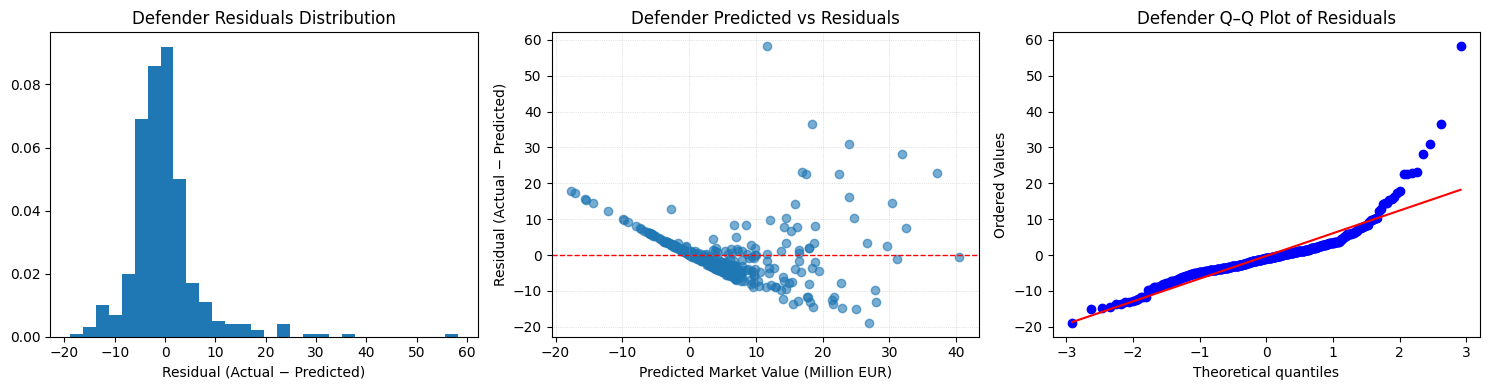

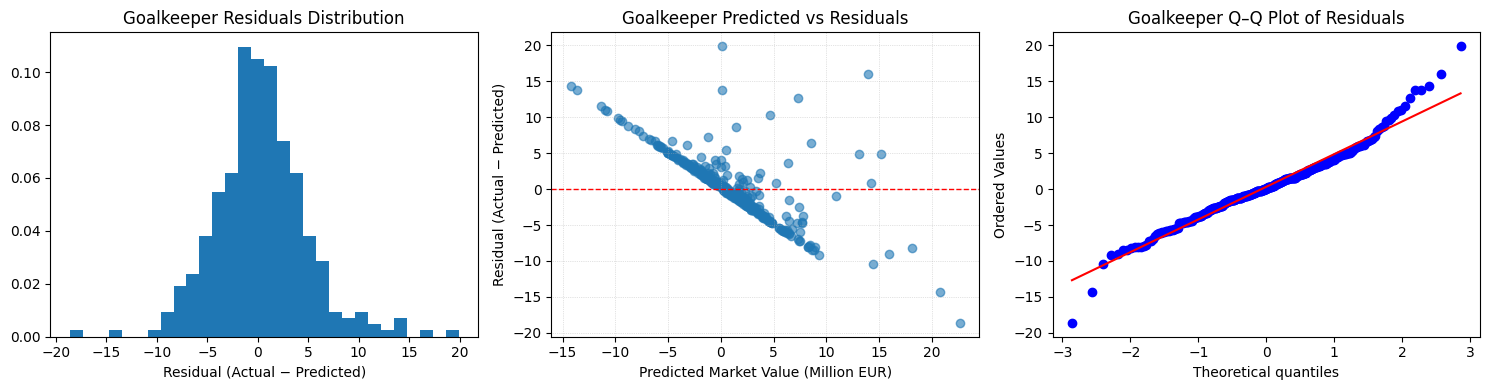

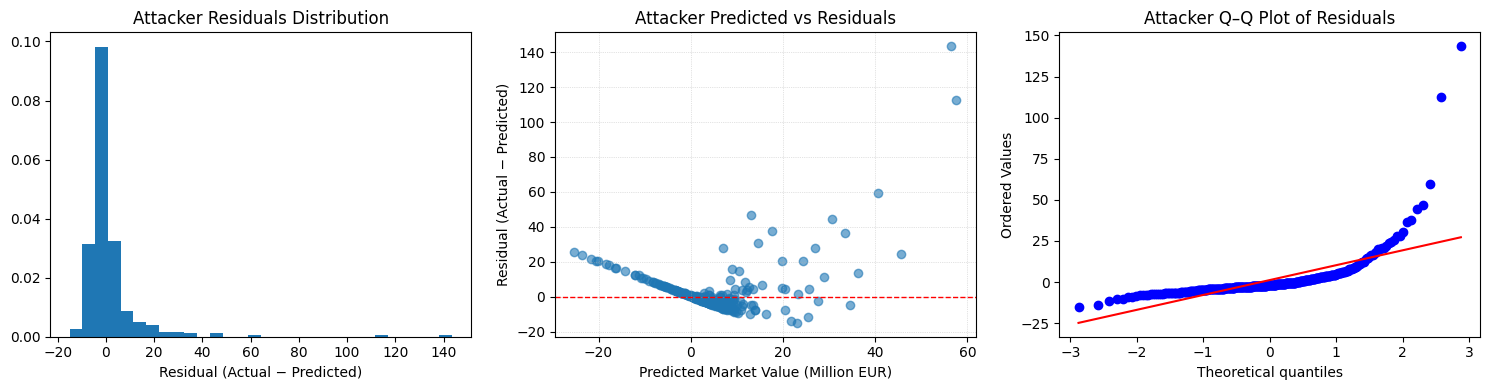

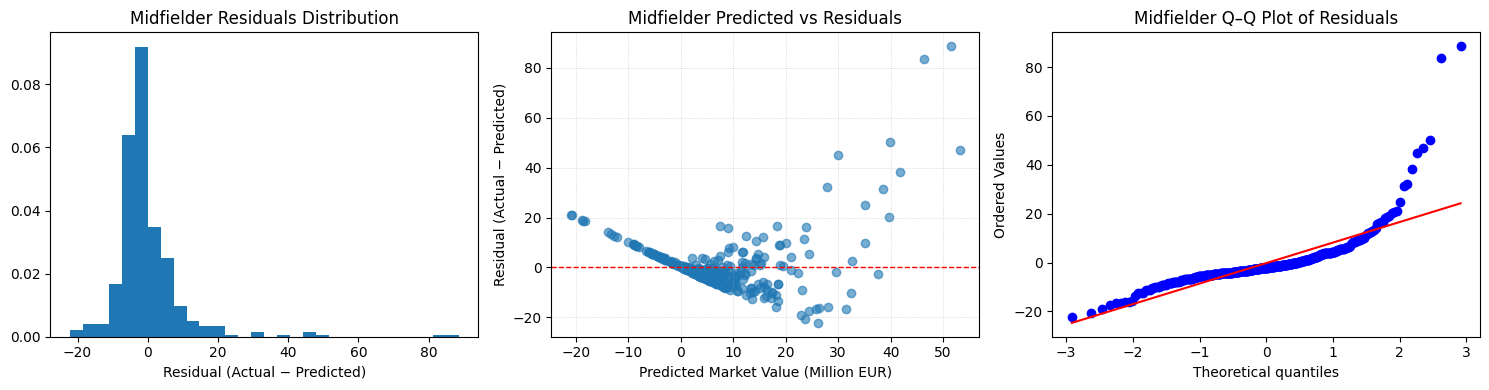

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# —— 1. 读取训练集 ——
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_1.csv')

# —— 2. 定义排除列并构造 X_train, y_train ——
exclude = [
    'market_value_million', 'position', 'position_group'
]
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_million']

# —— 3. 读取测试集并构造 X_test, y_test ——
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_2.csv')
X_test = test_df.drop(columns=exclude)
# 保证列顺序一致
X_test = X_test[X_train.columns]
y_test = test_df['market_value_million']

# —— 4. 训练并预测 ——
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# —— 5. 把预测和残差放到 test_df ——
test_df = test_df.copy()
test_df['pred']     = y_pred
test_df['residual'] = test_df['market_value_million'] - test_df['pred']

import matplotlib.pyplot as plt
from scipy import stats

# 假设 test_df 已经包含 'position', 'pred', 'residual' 列
positions = test_df['position_group'].unique()

for pos in positions:
    sub = test_df[test_df['position_group'] == pos]
    preds = sub['pred']
    residuals = sub['residual']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # 1) Residuals Distribution
    axes[0].hist(residuals, bins=30,density=True)
    axes[0].set_title(f'{pos} Residuals Distribution')
    axes[0].set_xlabel('Residual (Actual − Predicted)')

    # 2) Predicted vs Residuals
    axes[1].scatter(preds, residuals, alpha=0.6)
# 加一条水平参考线 y=0
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f'{pos} Predicted vs Residuals')
    axes[1].set_xlabel('Predicted Market Value (Million EUR)')
    axes[1].set_ylabel('Residual (Actual − Predicted)')
# 加网格，增强可读性
    axes[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    # 3) Q–Q Plot of Residuals
    stats.probplot(residuals, dist="norm", plot=axes[2])
    axes[2].set_title(f'{pos} Q–Q Plot of Residuals')

    plt.tight_layout()
    plt.show()



Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📌 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_1.csv')

# 📌 2. 定义评估函数
def evaluate_model(model, X, y, stratify, label="Model", n_splits=5, seeds=[91, 22, 67, 2025, 623]):
    rmse_scores, mae_scores, r2_scores = [], [], []
    for seed in seeds:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for train_idx, val_idx in skf.split(X, stratify):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
            mae_scores.append(mean_absolute_error(y_val, y_pred))
            r2_scores.append(r2_score(y_val, y_pred))

    print(f"RF Evaluation for {label}")
    print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
    print(f"MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"R²  : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    # return rmse_scores, mae_scores, r2_scores

# 📌 3. 特征和分层
exclude = ['market_value_million', 'position', 'position_group']
X = df.drop(columns=exclude)
strata = df['position']

# 📌 4. 模型初始化（默认参数）
rf = RandomForestRegressor(
    n_estimators=100,
    max_features='sqrt',  # 会在新版 sklearn 中警告，推荐使用 'sqrt' 替代
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# ✅ 使用原始 target
y = df['market_value_million']
evaluate_model(rf, X, y, strata, label="Market Value")


RF Evaluation for Market Value
RMSE: 4.5366 ± 0.5653
MAE : 1.5837 ± 0.0679
R²  : 0.7301 ± 0.0316


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

# 1. 读取并准备数据
X = df.drop(columns=exclude)
y = df['market_value_million']

# 2. 定义 5 折 CV 和 MAE scorer
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 3. 定义超参数分布
param_dist = {
    'n_estimators':      randint(100, 400),      # 100–800 棵树
    'max_depth':       [None] + list(range(10,80,5)),       # 树深 10–100
    'min_samples_split':   randint(2, 10),         # 内部节点最少样本 2–20
    'min_samples_leaf':   randint(1, 5),         # 叶子节点最少样本 1–20
    'max_features':      ['sqrt', 'log2', 0.3, 0.5],# 常用策略及比例
    'bootstrap':         [True, False]
}

# 4. 初始化模型 & RandomizedSearchCV
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=80,               # 尝试 80 组参数
    scoring=mae_scorer,
    cv=cv5,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True
)

# 5. 执行超参搜索
rand_search.fit(X, y)

# 6. 输出最优参数和 CV MAE
print("\n=== RandomizedSearchCV Best RF===")
print("Best params:")
for k, v in rand_search.best_params_.items():
    print(f"  {k}: {v}")
print(f"Best CV MAE: {-rand_search.best_score_:.4f} Million EUR")


Fitting 5 folds for each of 80 candidates, totalling 400 fits

=== RandomizedSearchCV Best RF===
Best params:
  bootstrap: True
  max_depth: 50
  max_features: 0.5
  min_samples_leaf: 4
  min_samples_split: 5
  n_estimators: 370
Best CV MAE: 1.3103 Million EUR


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📌 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_1.csv')

# 2. 最佳参数
best_params = {
    'bootstrap': True,
    'max_depth': 50,
    'max_features': 0.5,
    'min_samples_leaf': 4,
    'min_samples_split': 5,
    'n_estimators': 370,
    'random_state': 42,
    'n_jobs': -1
}

# 3. 训练最终模型
tuned_rf = RandomForestRegressor(**best_params)

# ✅ 使用原始 target
y = df['market_value_million']
evaluate_model(tuned_rf, X, y, strata, label="Tuned RF - Market Value")

RF Evaluation for Tuned RF - Market Value
RMSE: 3.9862 ± 0.5505
MAE : 1.3168 ± 0.0576
R²  : 0.7922 ± 0.0268


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# 1. 读取训练&测试数据
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_1.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/fc25_test_2.csv')

exclude = [
    'market_value_million','position',
    'position_group'
]
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_million']
X_test  = test_df.drop(columns=exclude)[X_train.columns]
y_test  = test_df['market_value_million']

# 3. 训练最终模型
tuned_rf.fit(X_train, y_train)

# 4. 测试集上预测 & 评估
y_pred_1 = tuned_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))
mae  = mean_absolute_error(y_test, y_pred_1)
r2   = r2_score(y_test, y_pred_1)

print("Tuned RF Test Set")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


Tuned RF Test Set
RMSE: 3.7256
MAE : 1.3284
R²  : 0.8235


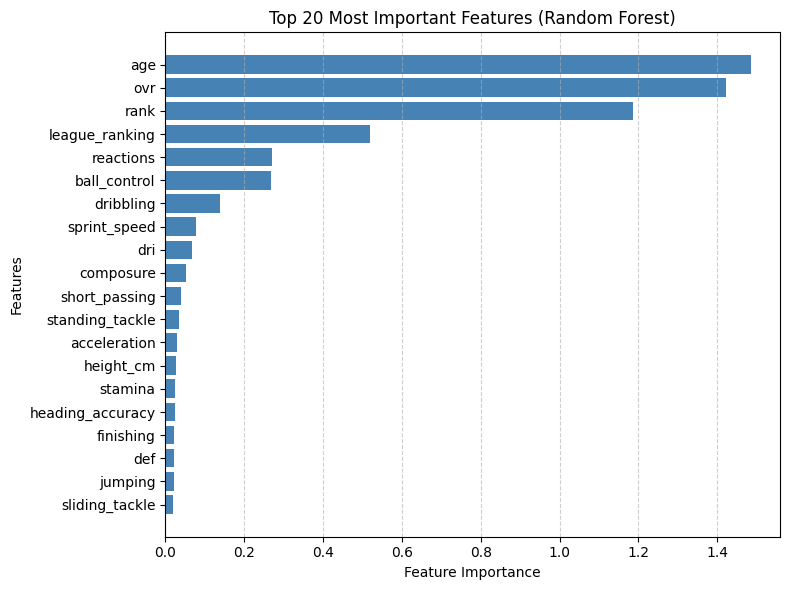

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 创建解释器 & 计算 SHAP 值
explainer = shap.Explainer(tuned_rf)
shap_values_test = explainer(X_test)

# 2. 计算 mean(|SHAP value|) 并选 Top 20
mean_abs_shap = np.abs(shap_values_test.values).mean(axis=0)
top_20_idx = np.argsort(mean_abs_shap)[-20:][::-1]
top_20_features = X_test.columns[top_20_idx]
top_20_importance = mean_abs_shap[top_20_idx]

# 3. 自定义 Bar 图（蓝色）
plt.figure(figsize=(8, 6))
plt.barh(top_20_features[::-1], top_20_importance[::-1], color='steelblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 20 Most Important Features (Random Forest)")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

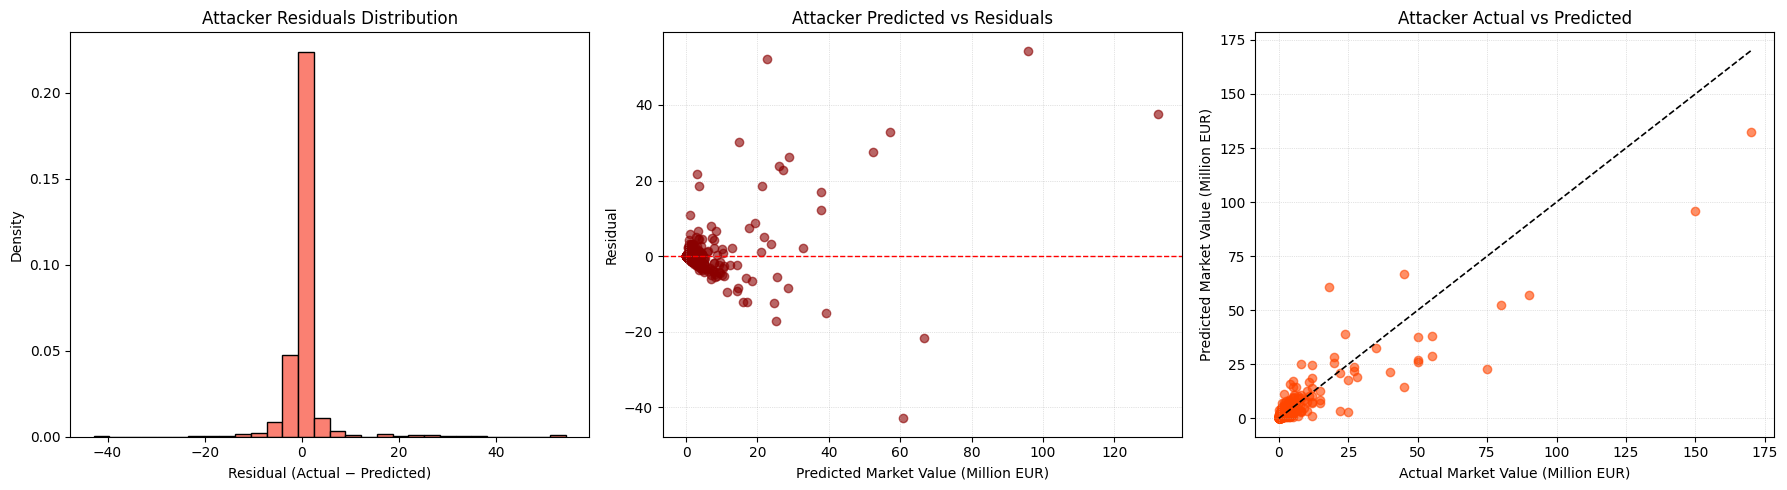

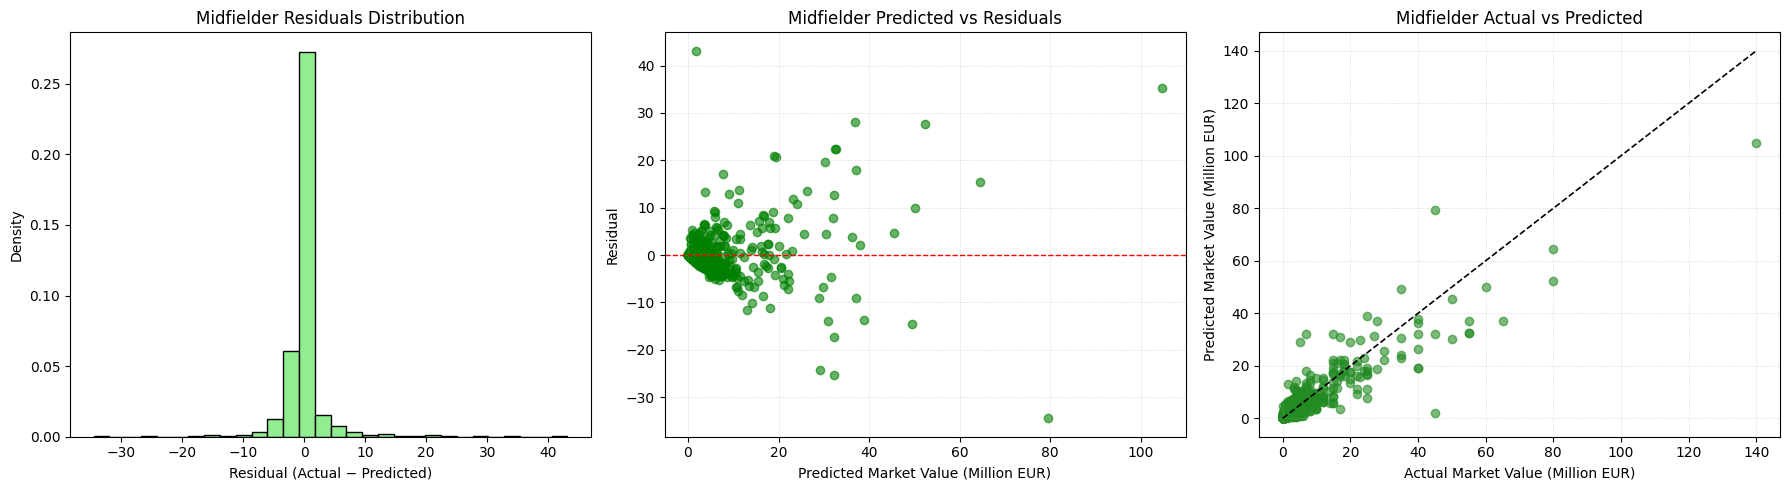

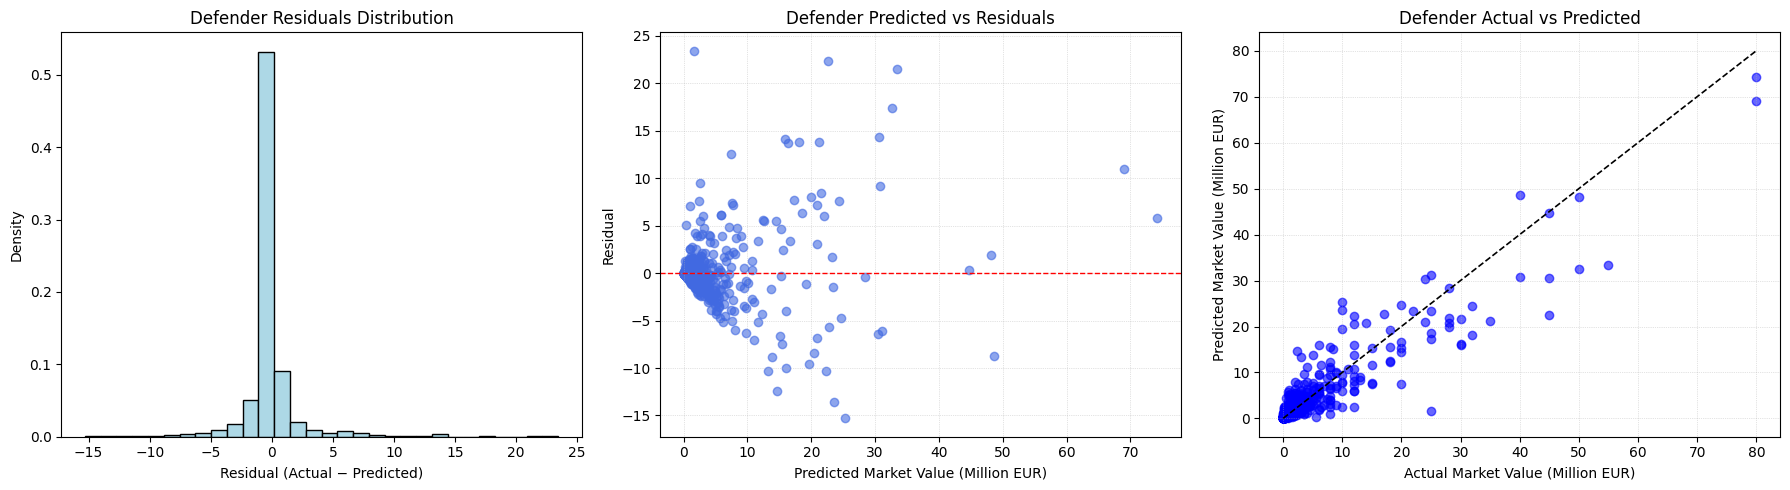

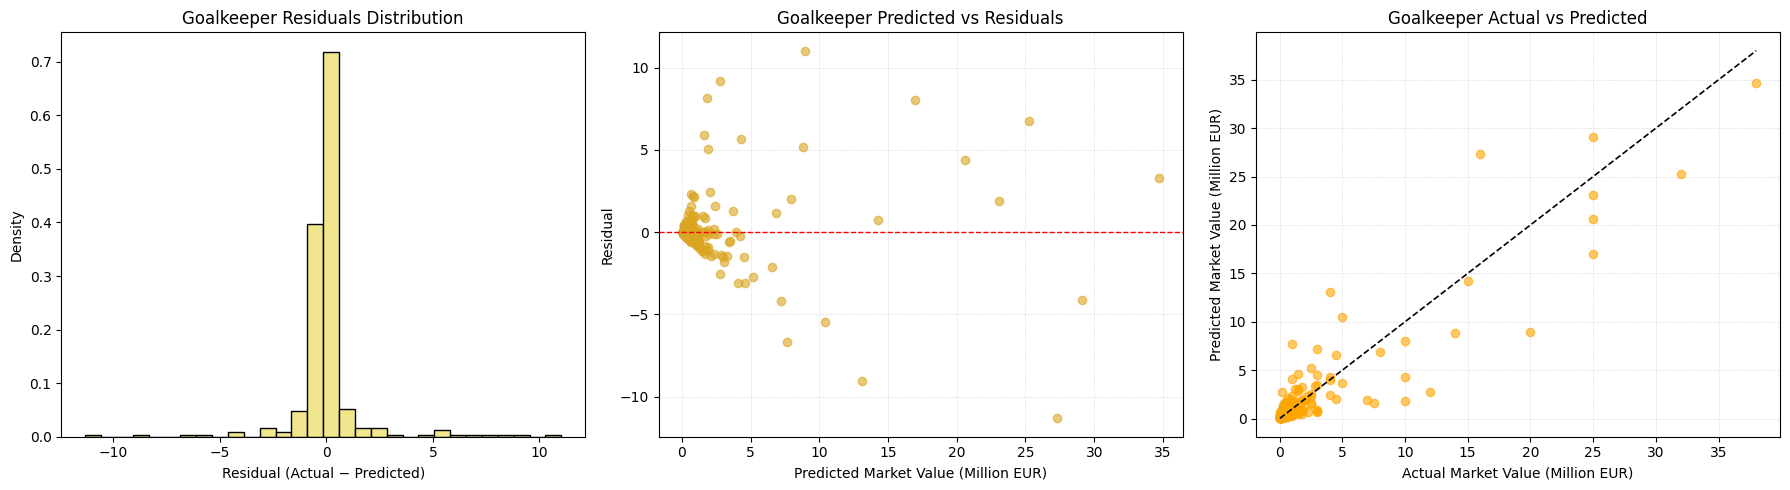

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 自定义每个位置组的配色方案
color_map = {
    'Attacker':   {'residual': 'salmon', 'scatter': 'darkred',   'actual_pred': 'orangered'},
    'Midfielder': {'residual': 'lightgreen', 'scatter': 'green', 'actual_pred': 'forestgreen'},
    'Defender':   {'residual': 'lightblue', 'scatter': 'royalblue', 'actual_pred': 'blue'},
    'Goalkeeper': {'residual': 'khaki', 'scatter': 'goldenrod', 'actual_pred': 'orange'}
}

# 添加预测列和残差列
test_df = test_df.copy()
test_df['pred']     = y_pred_1
test_df['residual'] = test_df['market_value_million'] - test_df['pred']

# 迭代每个位置绘图
positions = test_df['position_group'].unique()

for pos in positions:
    sub = test_df[test_df['position_group'] == pos]
    preds = sub['pred']
    actuals = sub['market_value_million']
    residuals = sub['residual']

    colors = color_map.get(pos, {
        'residual': 'gray', 'scatter': 'black', 'actual_pred': 'dimgray'
    })

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1) Residuals Distribution
    axes[0].hist(residuals, bins=30, density=True, color=colors['residual'], edgecolor='black')
    axes[0].set_title(f'{pos} Residuals Distribution')
    axes[0].set_xlabel('Residual (Actual − Predicted)')
    axes[0].set_ylabel('Density')

    # 2) Predicted vs Residuals
    axes[1].scatter(preds, residuals, alpha=0.6, color=colors['scatter'])
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f'{pos} Predicted vs Residuals')
    axes[1].set_xlabel('Predicted Market Value (Million EUR)')
    axes[1].set_ylabel('Residual')
    axes[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    # 3) Actual vs Predicted Scatter
    axes[2].scatter(actuals, preds, alpha=0.6, color=colors['actual_pred'])
    axes[2].plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()],
                 color='black', linestyle='--', linewidth=1.2)
    axes[2].set_title(f'{pos} Actual vs Predicted')
    axes[2].set_xlabel('Actual Market Value (Million EUR)')
    axes[2].set_ylabel('Predicted Market Value (Million EUR)')
    axes[2].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()


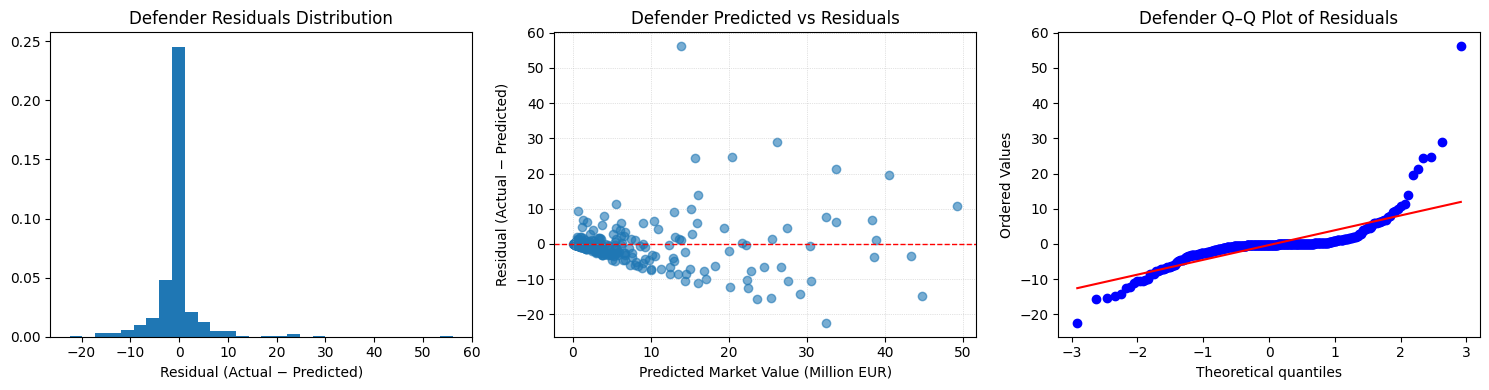

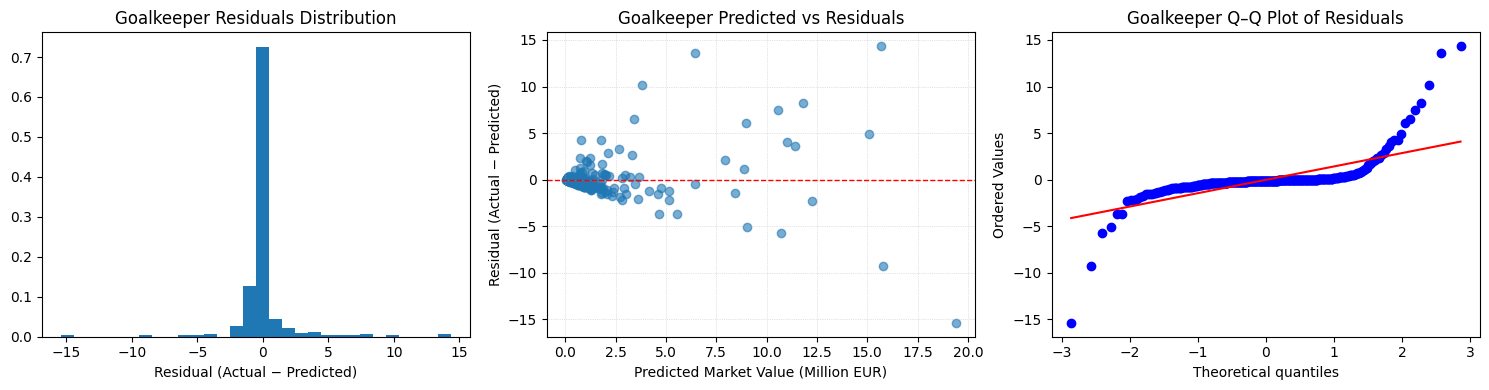

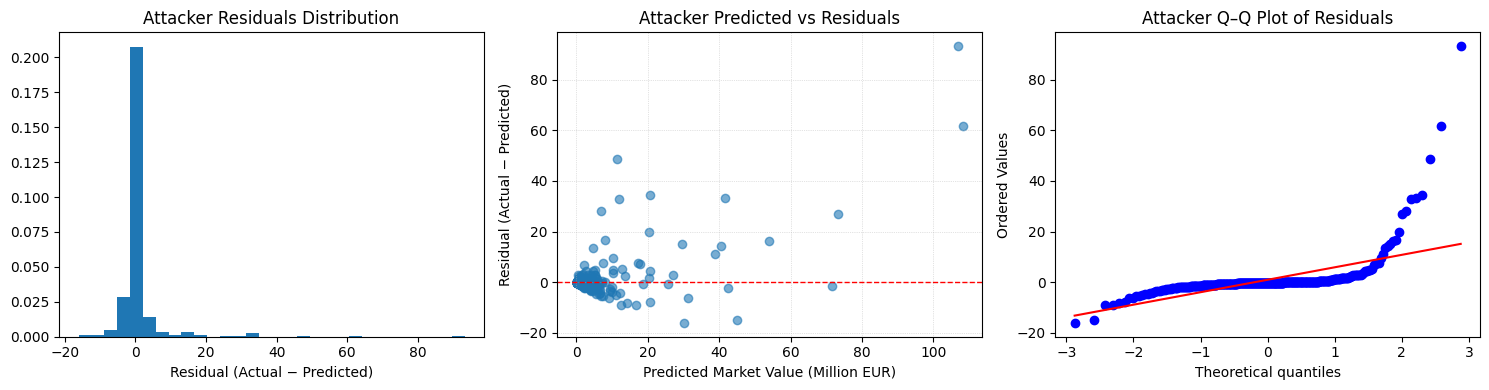

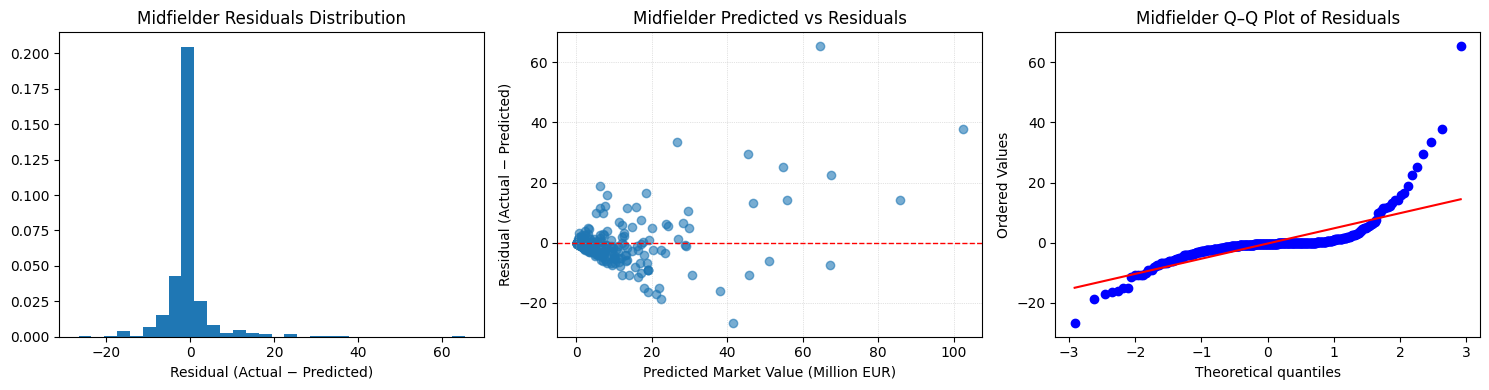

In [ ]:


# —— 1. 读取训练集 ——
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')

# —— 2. 定义排除列并构造 X_train, y_train ——
exclude = [
    'market_value_million', 'market_value_in_eur', 'position',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
    'gk_reflexes', 'position_group', 'name'
]
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_million']

# —— 3. 读取测试集并构造 X_test, y_test ——
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')
X_test = test_df.drop(columns=exclude)
# 保证列顺序一致
X_test = X_test[X_train.columns]
y_test = test_df['market_value_million']

# —— 4. 训练并预测 ——


# —— 5. 把预测和残差放到 test_df ——
test_df = test_df.copy()
test_df['pred']     = y_pred_1
test_df['residual'] = test_df['market_value_million'] - test_df['pred']

import matplotlib.pyplot as plt
from scipy import stats

# 假设 test_df 已经包含 'position', 'pred', 'residual' 列
positions = test_df['position_group'].unique()

for pos in positions:
    sub = test_df[test_df['position_group'] == pos]
    preds = sub['pred']
    residuals = sub['residual']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # 1) Residuals Distribution
    axes[0].hist(residuals, bins=30,density=True)
    axes[0].set_title(f'{pos} Residuals Distribution')
    axes[0].set_xlabel('Residual (Actual − Predicted)')

    # 2) Predicted vs Residuals
    axes[1].scatter(preds, residuals, alpha=0.6)
# 加一条水平参考线 y=0
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f'{pos} Predicted vs Residuals')
    axes[1].set_xlabel('Predicted Market Value (Million EUR)')
    axes[1].set_ylabel('Residual (Actual − Predicted)')
# 加网格，增强可读性
    axes[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    # 3) Q–Q Plot of Residuals
    stats.probplot(residuals, dist="norm", plot=axes[2])
    axes[2].set_title(f'{pos} Q–Q Plot of Residuals')

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load test set
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_2.csv')

# 2. Prepare X_test and y_test (ensure same feature order as training)
exclude = [
    'market_value_million','position',
    'position_group'
]
X_test_full = test_df.drop(columns=exclude)
X_test_full = X_test_full[X_train.columns]  # align columns
y_test_full = test_df['market_value_million']

# 3. Define position groups
groups = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper']

# 4. Evaluate tuned Random Forest on each subset
for grp in groups:
    idx = test_df['position_group'] == grp
    X_grp = X_test_full.loc[idx]
    y_grp = y_test_full.loc[idx]

    # Predict with your tuned RF model (best_rf)
    y_pred = tuned_rf.predict(X_grp)

    rmse = np.sqrt(mean_squared_error(y_grp, y_pred))
    mae  = mean_absolute_error(y_grp, y_pred)
    r2   = r2_score(y_grp, y_pred)

    print(f"\n=== Tuned RF Test for {grp} ===")
    print(f"Samples: {len(y_grp)}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")



=== Tuned RF Test for Attacker ===
Samples: 553
RMSE: 5.7616
MAE : 1.9077
R²  : 0.8064

=== Tuned RF Test for Midfielder ===
Samples: 1167
RMSE: 3.7792
MAE : 1.4744
R²  : 0.8190

=== Tuned RF Test for Defender ===
Samples: 1039
RMSE: 2.5821
MAE : 1.0648
R²  : 0.8574

=== Tuned RF Test for Goalkeeper ===
Samples: 334
RMSE: 1.7132
MAE : 0.6793
R²  : 0.8443


XGBoost

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📌 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_1.csv')

# 📌 2. 定义评估函数
def evaluate_model(model, X, y, stratify, label="Model", n_splits=5, seeds=[91,22,67,2025,623]):
    rmse_scores, mae_scores, r2_scores = [], [], []
    for seed in seeds:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for train_idx, val_idx in skf.split(X, stratify):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
            mae_scores.append(mean_absolute_error(y_val, y_pred))
            r2_scores.append(r2_score(y_val, y_pred))

    print(f"\n📊 Evaluation for {label}")
    print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
    print(f"MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"R²  : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    # return rmse_scores, mae_scores, r2_scores

# 📌 3. 特征选择与分层
exclude = ['market_value_million', 'position', 'position_group']
X = df.drop(columns=exclude)
strata = df['position']

# 📌 4. XGBoost 模型（默认参数）
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1,
                         max_depth=3, random_state=42, n_jobs=-1, verbosity=0)


# ✅ 使用原始 market_value_in_eur
y_raw = df['market_value_million']
evaluate_model(xgb_model, X, y_raw, strata, label="XGBoost Default - Market Value")



📊 Evaluation for XGBoost Default - Market Value
RMSE: 3.7332 ± 0.4113
MAE : 1.3799 ± 0.0535
R²  : 0.8166 ± 0.0219


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📌 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_1.csv')

# 📌 2. 定义评估函数
def evaluate_model(model, X, y, stratify, label="Model", n_splits=5, seeds=[91,22,67,2025,623]):
    rmse_scores, mae_scores, r2_scores = [], [], []
    for seed in seeds:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for train_idx, val_idx in skf.split(X, stratify):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
            mae_scores.append(mean_absolute_error(y_val, y_pred))
            r2_scores.append(r2_score(y_val, y_pred))

    print(f"\n📊 Evaluation for {label}")
    print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
    print(f"MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"R²  : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    # return rmse_scores, mae_scores, r2_scores

# 📌 3. 特征选择与分层
exclude = ['market_value_million', 'position', 'position_group']
X = df.drop(columns=exclude)
strata = df['position']

xgb_tuned = XGBRegressor(
    colsample_bytree=0.8059264473611898,
    learning_rate=0.05045321958909213,
    max_depth=6,
    n_estimators=287,
    subsample=0.6831809216468459,
    random_state=42
)
y_raw = df['market_value_million']
evaluate_model(xgb_tuned, X, y_raw, strata, label="XGBoost Default - Market Value")


📊 Evaluation for XGBoost Default - Market Value
RMSE: 3.6901 ± 0.4384
MAE : 1.2916 ± 0.0506
R²  : 0.8205 ± 0.0266


In [ ]:
# 假设你已经有一个预先切分好的测试集 CSV
df_test = pd.read_csv('/content/drive/MyDrive/fc25_test_2.csv')

# 同样做你在训练集上做的所有清洗／预处理
exclude = [
    'market_value_million','position',
    'position_group'
]
X_test = df_test.drop(columns=exclude)
X_test = X_test[X.columns]
y_test = df_test['market_value_million']

xgb_tuned.fit(X, y_raw)

y_pred_2 = xgb_tuned.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_2))
mae_test  = mean_absolute_error(y_test, y_pred_2)
r2_test   = r2_score(y_test, y_pred_2)

print(f"Test RMSE: {rmse_test:.4f} ")
print(f"Test MAE : {mae_test:.4f} ")
print(f"Test R²  : {r2_test:.4f}")

Test RMSE: 3.5996 
Test MAE : 1.2664 
Test R²  : 0.8352


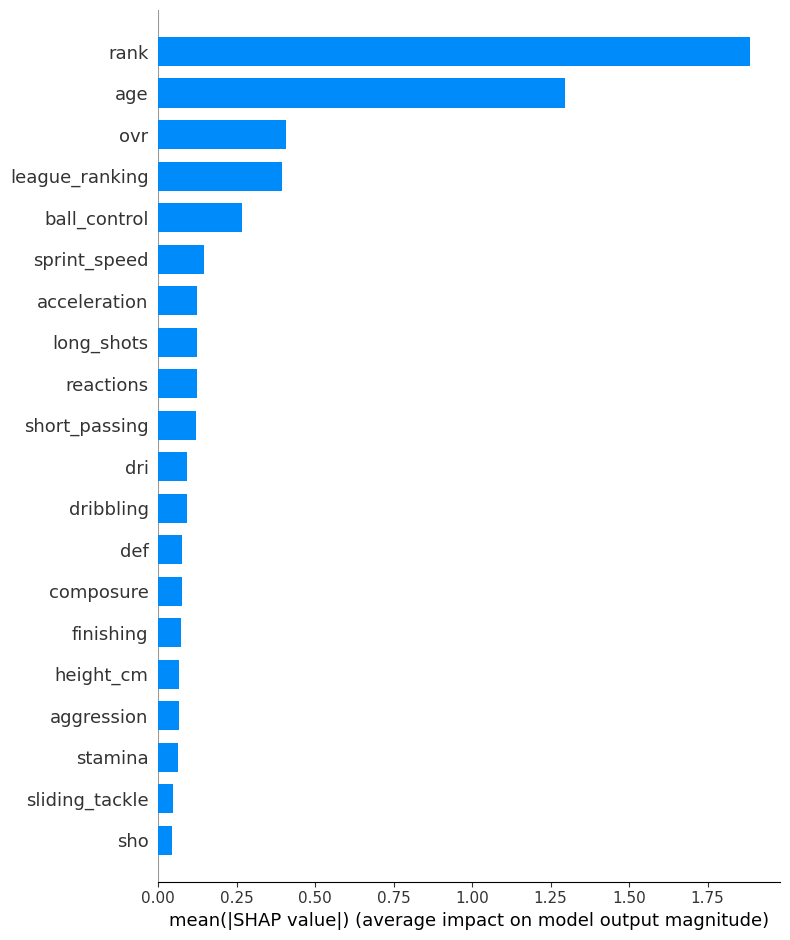

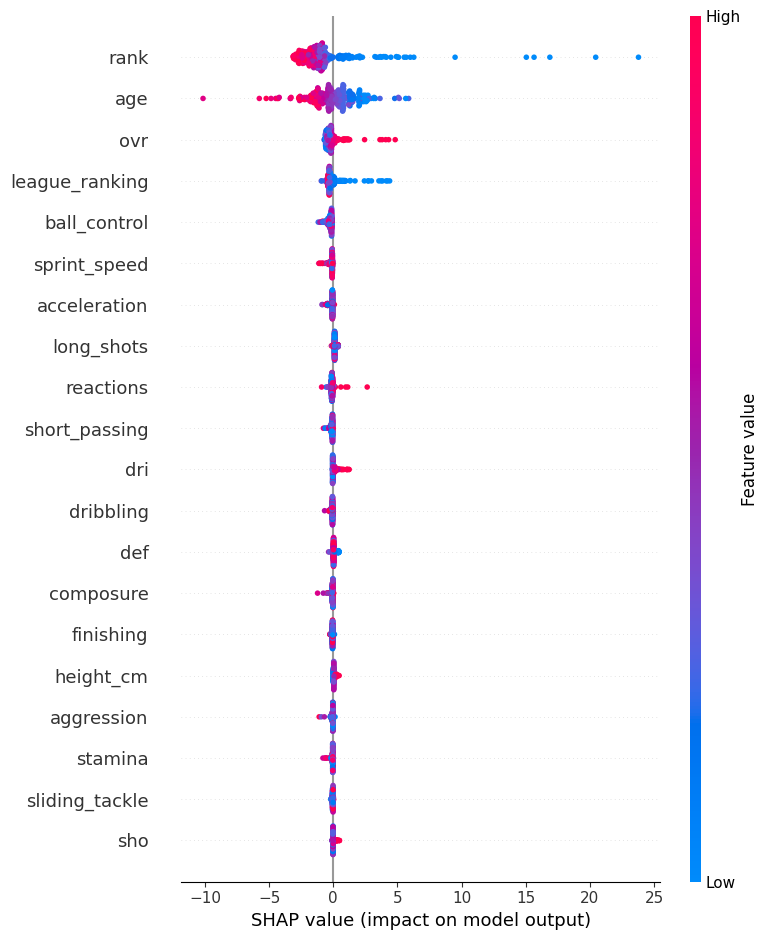

In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 筛选守门员子集
df_gk = df_test[df_test["position_group"] == "Goalkeeper"]
X_gk = df_gk.drop(columns=exclude)
X_gk = X_gk[X.columns]  # 确保列顺序和训练一致

# 使用 TreeExplainer 计算 SHAP 值（适配 XGBoost）
explainer = shap.TreeExplainer(xgb_tuned)
shap_values_gk = explainer.shap_values(X_gk)

shap.summary_plot(shap_values_gk, X_gk, plot_type="bar",
    feature_names=X_gk.columns,
    max_display=20)

# 6. Beeswarm 关系图
shap.summary_plot(shap_values_gk, X_gk, feature_names=X_gk.columns,
    max_display=20)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

# 1. Load data
df = pd.read_csv('/content/drive/MyDrive/fc25_train_1.csv')
exclude = [
    'market_value_million','position',
    'position_group'
]
X = df.drop(columns=exclude)
y = df['market_value_million']

# 2. 5-fold CV and MAE scorer
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 3. Hyperparameter distributions for XGBRegressor
param_dist = {
    'n_estimators':    randint(100, 600),       # number of trees
    'max_depth':       randint(3, 11),         # tree depth
    'learning_rate':   uniform(0.01, 0.29),    # eta
    'subsample':       uniform(0.5, 0.5),      # row sampling
    'colsample_bytree':uniform(0.5, 0.5)         # [0,1)# column sampling per tree
}

# 4. Initialize model & RandomizedSearchCV
xgb = XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=80,               # try 100 combinations
    scoring=mae_scorer,
    cv=cv5,
    random_state=42,
    n_jobs=-1,
    verbose=2,
    refit=True
)

# 5. Run hyperparameter search
rand_search.fit(X, y)

# 6. Output best parameters and CV MAE
print("\n=== RandomizedSearchCV Best for XGBRegressor ===")
print("Best params:")
for k, v in rand_search.best_params_.items():
    print(f"  {k}: {v}")
print(f"Best CV MAE: {-rand_search.best_score_:.4f} Million EUR")



Fitting 5 folds for each of 80 candidates, totalling 400 fits

=== RandomizedSearchCV Best for XGBRegressor ===
Best params:
  colsample_bytree: 0.8059264473611898
  learning_rate: 0.05045321958909213
  max_depth: 6
  n_estimators: 287
  subsample: 0.6831809216468459
Best CV MAE: 1.2957 Million EUR


In [ ]:
# 📌 3. 特征选择与分层
exclude = ['market_value_million', 'position', 'position_group']
X = df.drop(columns=exclude)
strata = df['position']

# 📌 4. XGBoost 模型（默认参数）
xgb_tuned = rand_search.best_estimator_


# ✅ 使用原始 market_value_in_eur
y_raw = df['market_value_million']
evaluate_model(xgb_tuned, X, y_raw, strata, label="XGBoost Tuned - Market Value")



📊 Evaluation for XGBoost Tuned - Market Value
RMSE: 3.6901 ± 0.4384
MAE : 1.2916 ± 0.0506
R²  : 0.8205 ± 0.0266


In [ ]:
# 假设你已经有一个预先切分好的测试集 CSV
df_test = pd.read_csv('/content/drive/MyDrive/fc25_test_2.csv')

# 同样做你在训练集上做的所有清洗／预处理
exclude = [
    'market_value_million','position',
    'position_group'
]
X_test = df_test.drop(columns=exclude)
X_test = X_test[X.columns]
y_test = df_test['market_value_million']

xgb_tuned.fit(X, y_raw)

y_pred_2 = xgb_tuned.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_2))
mae_test  = mean_absolute_error(y_test, y_pred_2)
r2_test   = r2_score(y_test, y_pred_2)

print(f"Test RMSE: {rmse_test:.4f} ")
print(f"Test MAE : {mae_test:.4f} ")
print(f"Test R²  : {r2_test:.4f}")


Test RMSE: 3.5996 
Test MAE : 1.2664 
Test R²  : 0.8352


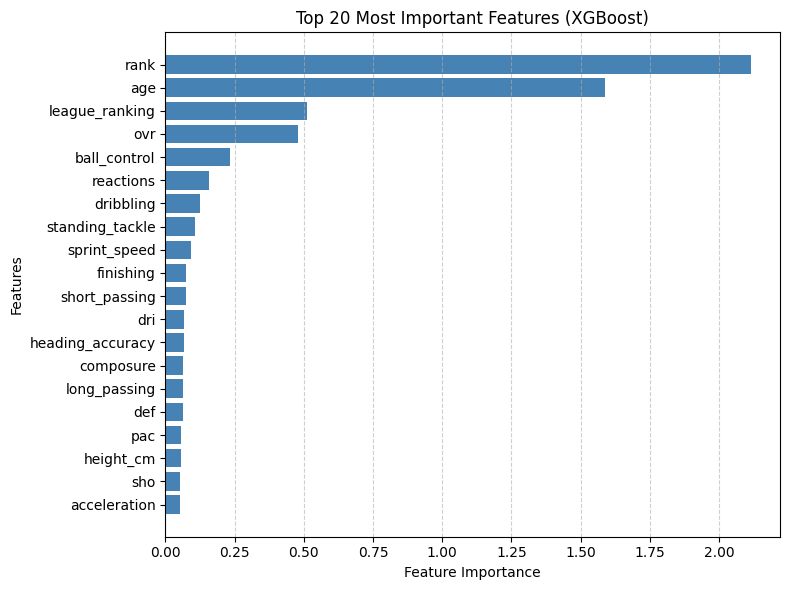

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 创建解释器 & 计算 SHAP 值
explainer = shap.Explainer(xgb_tuned)
shap_values_test = explainer(X_test)

# 2. 计算 mean(|SHAP value|) 并选 Top 20
mean_abs_shap = np.abs(shap_values_test.values).mean(axis=0)
top_20_idx = np.argsort(mean_abs_shap)[-20:][::-1]
top_20_features = X_test.columns[top_20_idx]
top_20_importance = mean_abs_shap[top_20_idx]

# 3. 自定义 Bar 图（蓝色）
plt.figure(figsize=(8, 6))
plt.barh(top_20_features[::-1], top_20_importance[::-1], color='steelblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 20 Most Important Features (XGBoost)")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 假设你已经有以下变量：
# - df_test：包含测试集原始数据（含 market_value_million 和 position_group）
# - y_test：真实身价
# - y_pred_2：XGBoost 预测结果

df_test = df_test.copy()
df_test['pred'] = y_pred_2
df_test['residual'] = df_test['market_value_million'] - df_test['pred']

# 分组评估
position_groups = df_test['position_group'].unique()

for group in position_groups:
    sub = df_test[df_test['position_group'] == group]
    y_true = sub['market_value_million']
    y_pred = sub['pred']

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {group} - Model Performance on Test Set:")
    print(f"Samples: {len(sub)}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")


📊 Attacker - Model Performance on Test Set:
Samples: 553
RMSE: 5.6489
MAE : 1.8048
R²  : 0.8139

📊 Midfielder - Model Performance on Test Set:
Samples: 1167
RMSE: 3.5860
MAE : 1.3978
R²  : 0.8371

📊 Defender - Model Performance on Test Set:
Samples: 1039
RMSE: 2.5053
MAE : 1.0259
R²  : 0.8658

📊 Goalkeeper - Model Performance on Test Set:
Samples: 334
RMSE: 1.6421
MAE : 0.6642
R²  : 0.8570


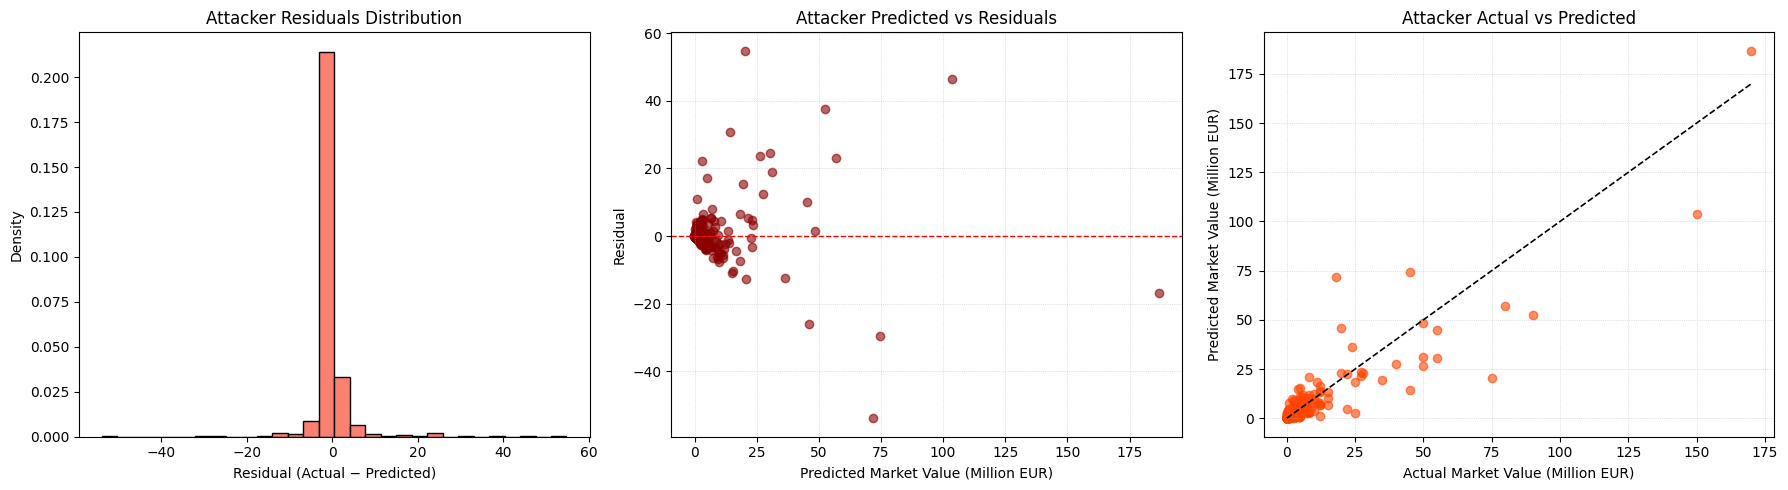

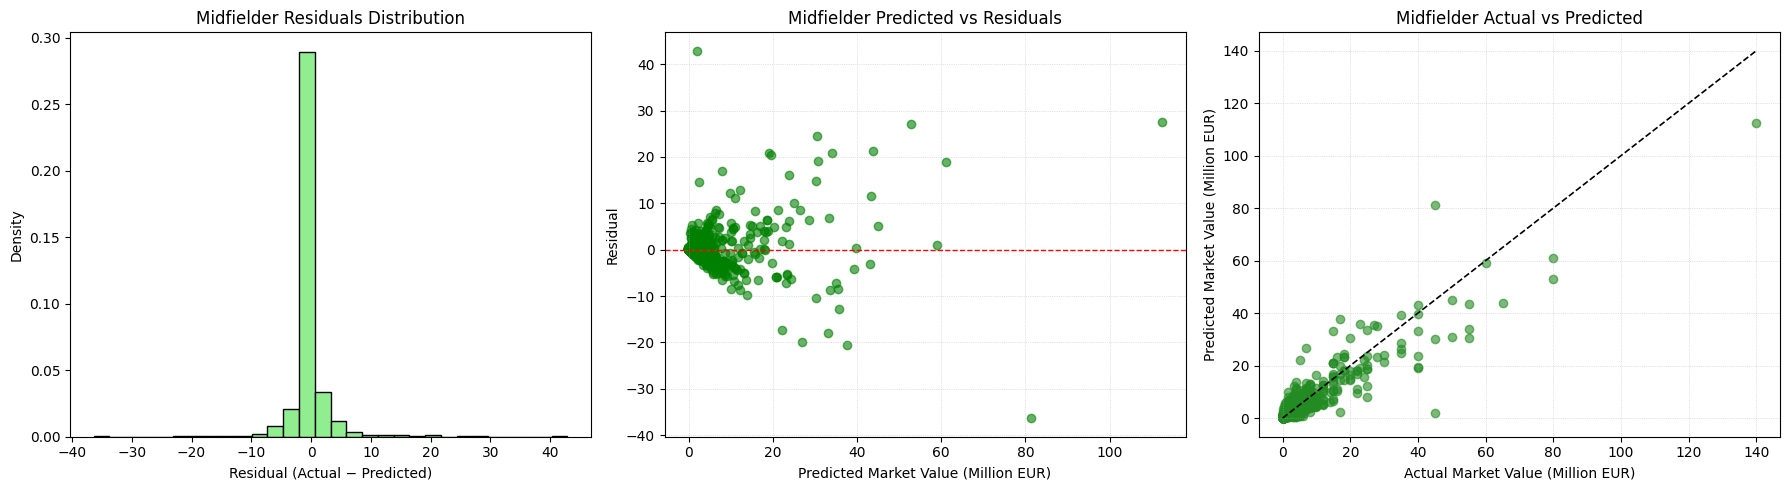

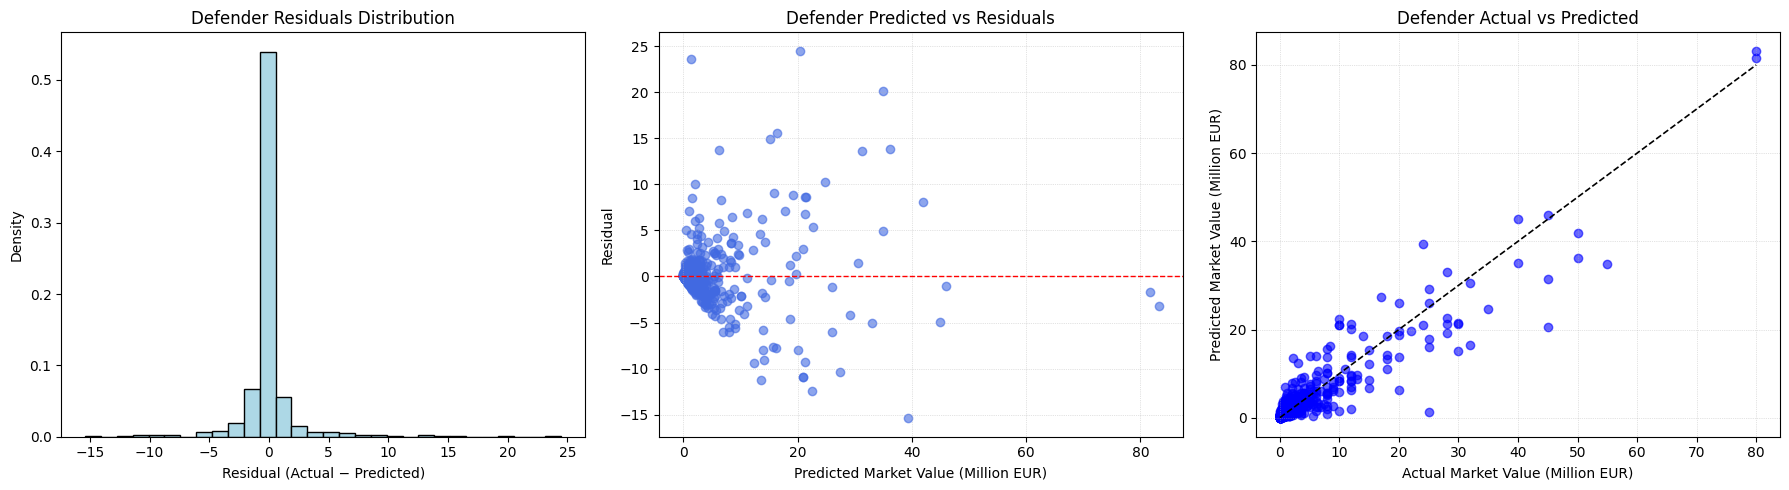

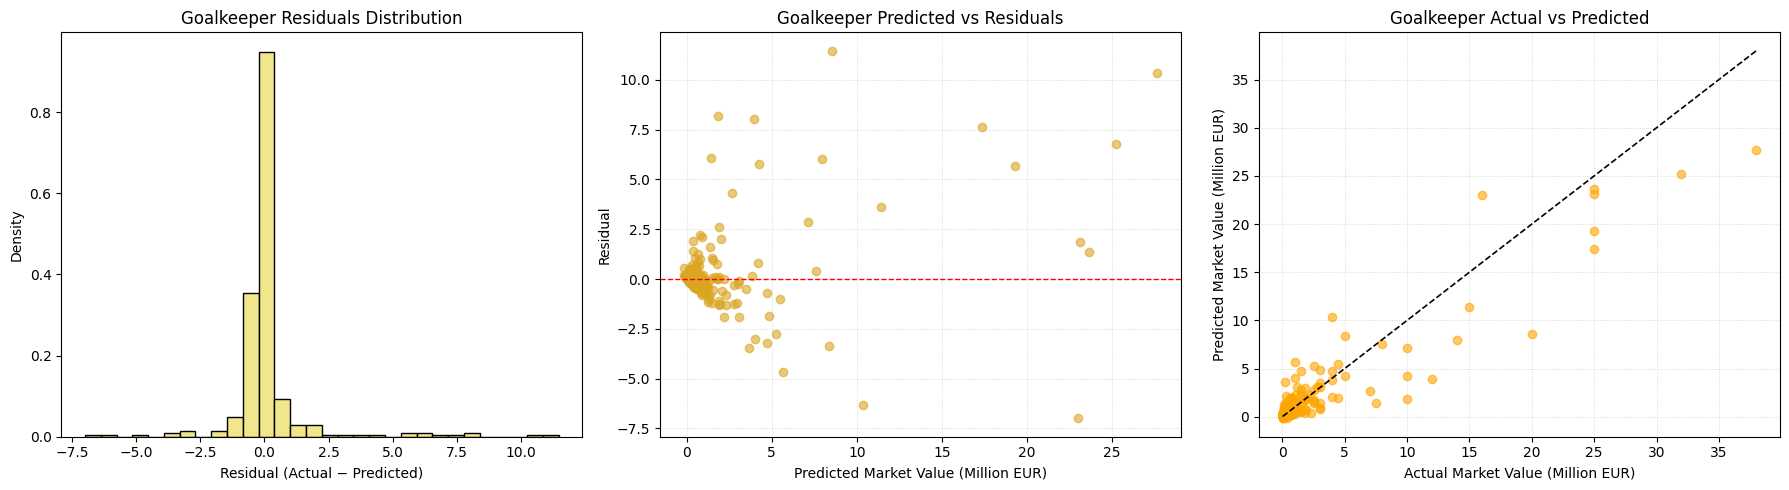

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 自定义每个位置组的配色方案
color_map = {
    'Attacker':   {'residual': 'salmon', 'scatter': 'darkred',   'actual_pred': 'orangered'},
    'Midfielder': {'residual': 'lightgreen', 'scatter': 'green', 'actual_pred': 'forestgreen'},
    'Defender':   {'residual': 'lightblue', 'scatter': 'royalblue', 'actual_pred': 'blue'},
    'Goalkeeper': {'residual': 'khaki', 'scatter': 'goldenrod', 'actual_pred': 'orange'}
}

# 添加预测列和残差列
test_df = test_df.copy()
test_df['pred']     = y_pred_2
test_df['residual'] = test_df['market_value_million'] - test_df['pred']

# 迭代每个位置绘图
positions = test_df['position_group'].unique()

for pos in positions:
    sub = test_df[test_df['position_group'] == pos]
    preds = sub['pred']
    actuals = sub['market_value_million']
    residuals = sub['residual']

    colors = color_map.get(pos, {
        'residual': 'gray', 'scatter': 'black', 'actual_pred': 'dimgray'
    })

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1) Residuals Distribution
    axes[0].hist(residuals, bins=30, density=True, color=colors['residual'], edgecolor='black')
    axes[0].set_title(f'{pos} Residuals Distribution')
    axes[0].set_xlabel('Residual (Actual − Predicted)')
    axes[0].set_ylabel('Density')

    # 2) Predicted vs Residuals
    axes[1].scatter(preds, residuals, alpha=0.6, color=colors['scatter'])
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f'{pos} Predicted vs Residuals')
    axes[1].set_xlabel('Predicted Market Value (Million EUR)')
    axes[1].set_ylabel('Residual')
    axes[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    # 3) Actual vs Predicted Scatter
    axes[2].scatter(actuals, preds, alpha=0.6, color=colors['actual_pred'])
    axes[2].plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()],
                 color='black', linestyle='--', linewidth=1.2)
    axes[2].set_title(f'{pos} Actual vs Predicted')
    axes[2].set_xlabel('Actual Market Value (Million EUR)')
    axes[2].set_ylabel('Predicted Market Value (Million EUR)')
    axes[2].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()


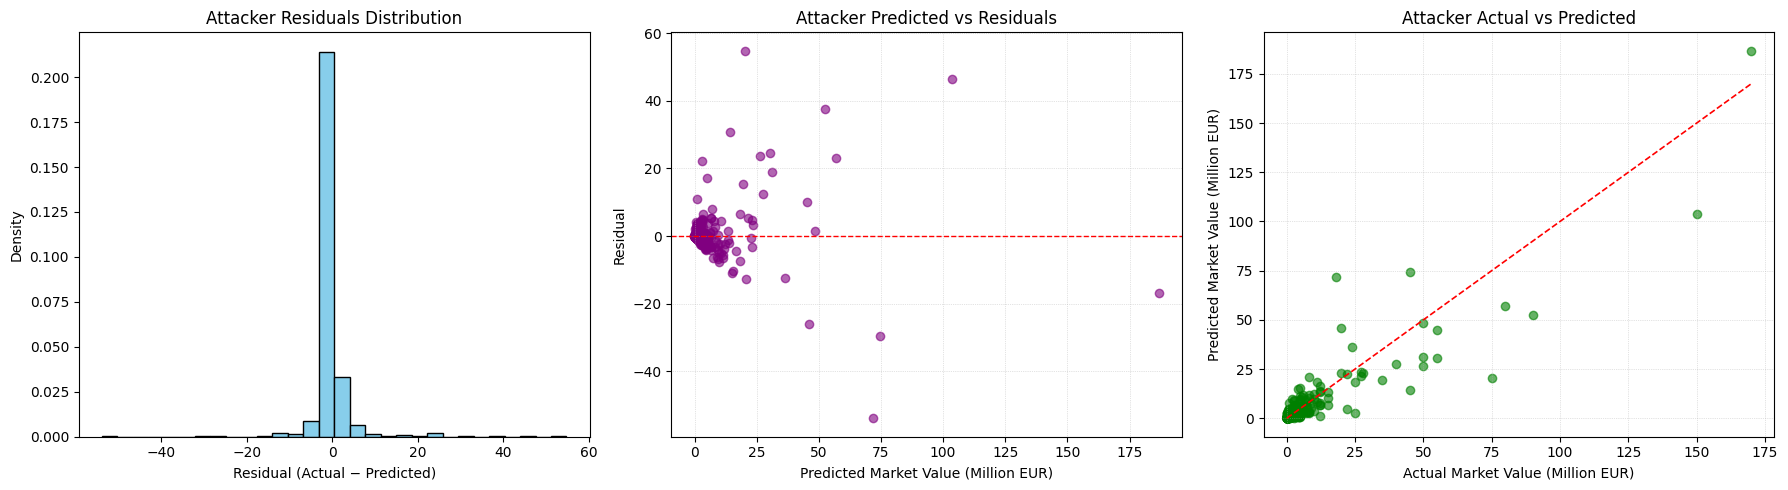

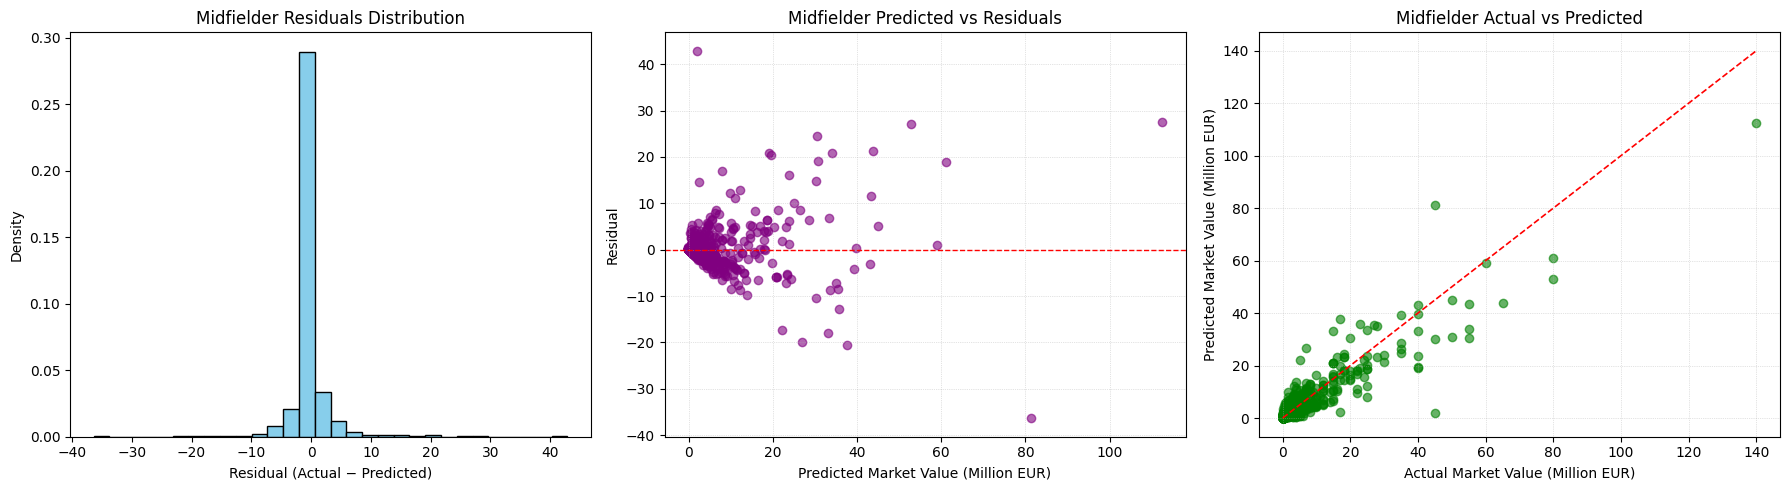

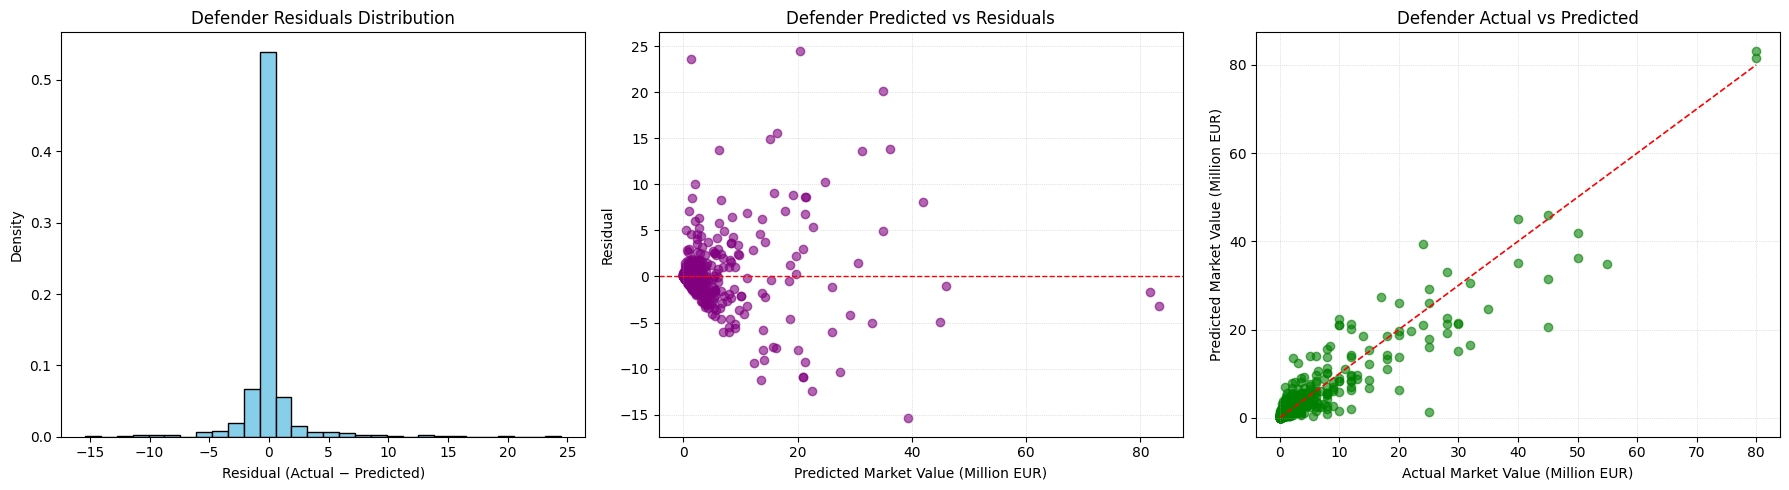

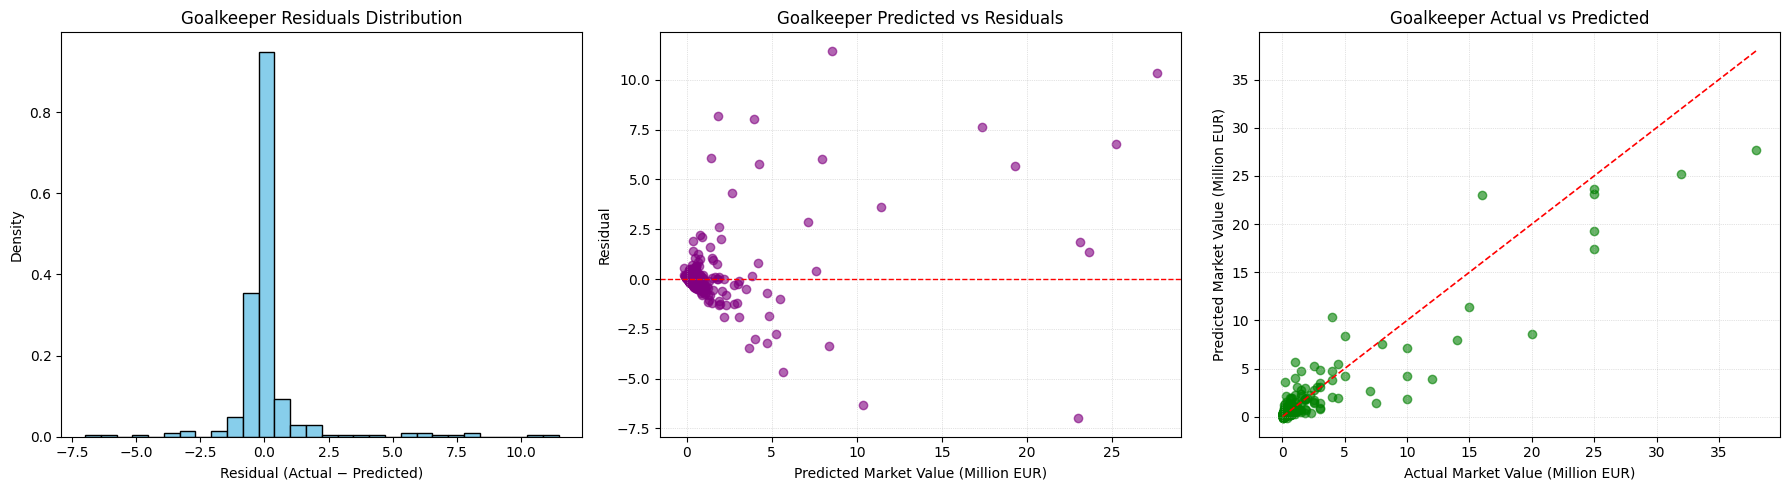

In [ ]:
# —— 1. 读取训练集 ——
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_1.csv')

# —— 2. 定义排除列并构造 X_train, y_train ——
exclude = [
    'market_value_million',  'position',
     'position_group'
]
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_million']

# —— 3. 读取测试集并构造 X_test, y_test ——
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_2.csv')
X_test = test_df.drop(columns=exclude)
# 保证列顺序一致
X_test = X_test[X_train.columns]
y_test = test_df['market_value_million']

# —— 4. 训练并预测 ——


# —— 5. 把预测和残差放到 test_df ——
test_df = test_df.copy()
test_df['pred']     = y_pred_2
test_df['residual'] = test_df['market_value_million'] - test_df['pred']

import matplotlib.pyplot as plt
from scipy import stats

# 假设 test_df 已经包含 'position', 'pred', 'residual' 列
positions = test_df['position_group'].unique()

for pos in positions:
    sub = test_df[test_df['position_group'] == pos]
    preds = sub['pred']
    actuals = sub['market_value_million']
    residuals = sub['residual']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1) Residuals Distribution
    axes[0].hist(residuals, bins=30, density=True, color='skyblue', edgecolor='black')
    axes[0].set_title(f'{pos} Residuals Distribution')
    axes[0].set_xlabel('Residual (Actual − Predicted)')
    axes[0].set_ylabel('Density')

    # 2) Predicted vs Residuals
    axes[1].scatter(preds, residuals, alpha=0.6, color='purple')
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f'{pos} Predicted vs Residuals')
    axes[1].set_xlabel('Predicted Market Value (Million EUR)')
    axes[1].set_ylabel('Residual')
    axes[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    # 3) Actual vs Predicted Scatter
    axes[2].scatter(actuals, preds, alpha=0.6, color='green')
    axes[2].plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()],
                 color='red', linestyle='--', linewidth=1.2)
    axes[2].set_title(f'{pos} Actual vs Predicted')
    axes[2].set_xlabel('Actual Market Value (Million EUR)')
    axes[2].set_ylabel('Predicted Market Value (Million EUR)')
    axes[2].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load test set
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_2.csv')

# 2. Prepare X_test and y_test (ensure same feature order as training)
exclude = [
    'market_value_million','position',
    'position_group'
]
X_test_full = test_df.drop(columns=exclude)
X_test_full = X_test_full[X_train.columns]  # align columns
y_test_full = test_df['market_value_million']

# 3. Define position groups
groups = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper']

# 4. Evaluate tuned Random Forest on each subset
for grp in groups:
    idx = test_df['position_group'] == grp
    X_grp = X_test_full.loc[idx]
    y_grp = y_test_full.loc[idx]

    # Predict with your tuned RF model (best_rf)
    y_pred = xgb_tuned.predict(X_grp)

    rmse = np.sqrt(mean_squared_error(y_grp, y_pred))
    mae  = mean_absolute_error(y_grp, y_pred)
    r2   = r2_score(y_grp, y_pred)

    print(f"\n=== Tuned XGB Test for {grp} ===")
    print(f"Samples: {len(y_grp)}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")



=== Tuned XGB Test for Attacker ===
Samples: 553
RMSE: 5.6489
MAE : 1.8048
R²  : 0.8139

=== Tuned XGB Test for Midfielder ===
Samples: 1167
RMSE: 3.5860
MAE : 1.3978
R²  : 0.8371

=== Tuned XGB Test for Defender ===
Samples: 1039
RMSE: 2.5053
MAE : 1.0259
R²  : 0.8658

=== Tuned XGB Test for Goalkeeper ===
Samples: 334
RMSE: 1.6421
MAE : 0.6642
R²  : 0.8570


LightGBM

In [ ]:

# 1. 导入并构建 LGBM
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_1.csv')
exclude = [
    'market_value_million','position',
    'position_group'
]
X = df.drop(columns=exclude)
y = df['market_value_million']

# 3. 定义一个简单的交叉验证评估
def evaluate_model(model, X, y, stratify, label="Model", n_splits=5, seeds=[91,22,67,2025,623]):
    rmse_scores, mae_scores, r2_scores = [], [], []
    for seed in seeds:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for train_idx, val_idx in skf.split(X, stratify):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
            mae_scores.append(mean_absolute_error(y_val, y_pred))
            r2_scores.append(r2_score(y_val, y_pred))

    print(f"\n📊 Evaluation for {label}")
    print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
    print(f"MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"R²  : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    # return rmse_scores, mae_scores, r2_scores
    # 📌 3. 特征选择与分层
exclude = ['market_value_million',  'position', 'position_group']
X = df.drop(columns=exclude)
strata = df['position']

# 📌 4. XGBoost 模型（默认参数）
lgbm = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)


# ✅ 使用原始 market_value_in_eur
y_raw = df['market_value_million']
evaluate_model(lgbm, X, y_raw, strata, label="LightGBM Default - Market Value")



📊 Evaluation for LightGBM Default - Market Value
RMSE: 3.8953 ± 0.5431
MAE : 1.3261 ± 0.0674
R²  : 0.8013 ± 0.0280


In [ ]:
# 2. 定义 LightGBM 模型
lgbm = LGBMRegressor(random_state=42, n_jobs=-1)

# 3. 定义随机搜索的超参分布
param_dist = {
    'n_estimators':       randint(150, 300),
    'learning_rate':      uniform(0.03, 0.07),
    'max_depth':          randint(3, 13),
    'num_leaves':         randint(30, 80),
    'min_child_samples':  randint(10, 30),
    'subsample':          uniform(0.7, 0.3),
    'colsample_bytree':   uniform(0.7, 0.3)
}

# 4. 设置 5 折交叉验证和评分
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 5. 构建 RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=80,               # 尝试 100 组参数
    scoring=mae_scorer,
    cv=cv,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# 6. 执行超参搜索
rs.fit(X, y_raw)

# 7. 输出最优参数和 CV MAE
print("Best LightGBM params:")
for k, v in rs.best_params_.items():
    print(f"  {k}: {v}")
print(f"Best CV MAE: {-rs.best_score_:.4f} Million EUR")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best LightGBM params:
  colsample_bytree: 0.9078671076075817
  learning_rate: 0.05438356231172382
  max_depth: 10
  min_child_samples: 13
  n_estimators: 170
  num_leaves: 65
  subsample: 0.7532318631339168
Best CV MAE: 1.3079 Million EUR


In [ ]:
lgbm_tuned = rs.best_estimator_

# ✅ 使用原始 market_value_in_eur
y_raw = df['market_value_million']
evaluate_model(lgbm_tuned, X, y_raw, strata, label="LightGBM Tuned - Market Value")


📊 Evaluation for LightGBM Tuned - Market Value
RMSE: 3.8913 ± 0.5117
MAE : 1.3090 ± 0.0600
R²  : 0.8016 ± 0.0250


In [ ]:
# 假设你已经有一个预先切分好的测试集 CSV
df_test = pd.read_csv('/content/drive/MyDrive/fc25_test_2.csv')

# 同样做你在训练集上做的所有清洗／预处理
exclude = [
    'market_value_million','position',
    'position_group'
]
X_test = df_test.drop(columns=exclude)
X_test = X_test[X.columns]
y_test = df_test['market_value_million']

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lgbm_tuned.fit(X, y_raw)
y_pred_3 = lgbm_tuned.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_3))
mae_test  = mean_absolute_error(y_test, y_pred_3)
r2_test   = r2_score(y_test, y_pred_3)

print(f"Test RMSE: {rmse_test:.4f} ")
print(f"Test MAE : {mae_test:.4f} ")
print(f"Test R²  : {r2_test:.4f}")


Test RMSE: 3.5868 
Test MAE : 1.2575 
Test R²  : 0.8364


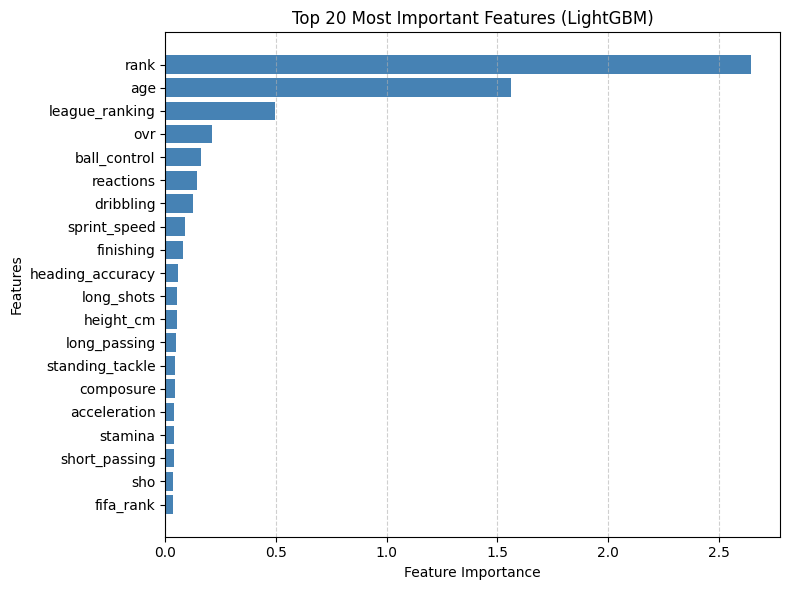

In [ ]:
# 1. 创建解释器 & 计算 SHAP 值
explainer = shap.Explainer(lgbm_tuned)
shap_values_test = explainer(X_test)

# 2. 计算 mean(|SHAP value|) 并选 Top 20
mean_abs_shap = np.abs(shap_values_test.values).mean(axis=0)
top_20_idx = np.argsort(mean_abs_shap)[-20:][::-1]
top_20_features = X_test.columns[top_20_idx]
top_20_importance = mean_abs_shap[top_20_idx]

# 3. 自定义 Bar 图（蓝色）
plt.figure(figsize=(8, 6))
plt.barh(top_20_features[::-1], top_20_importance[::-1], color='steelblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 20 Most Important Features (LightGBM)")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

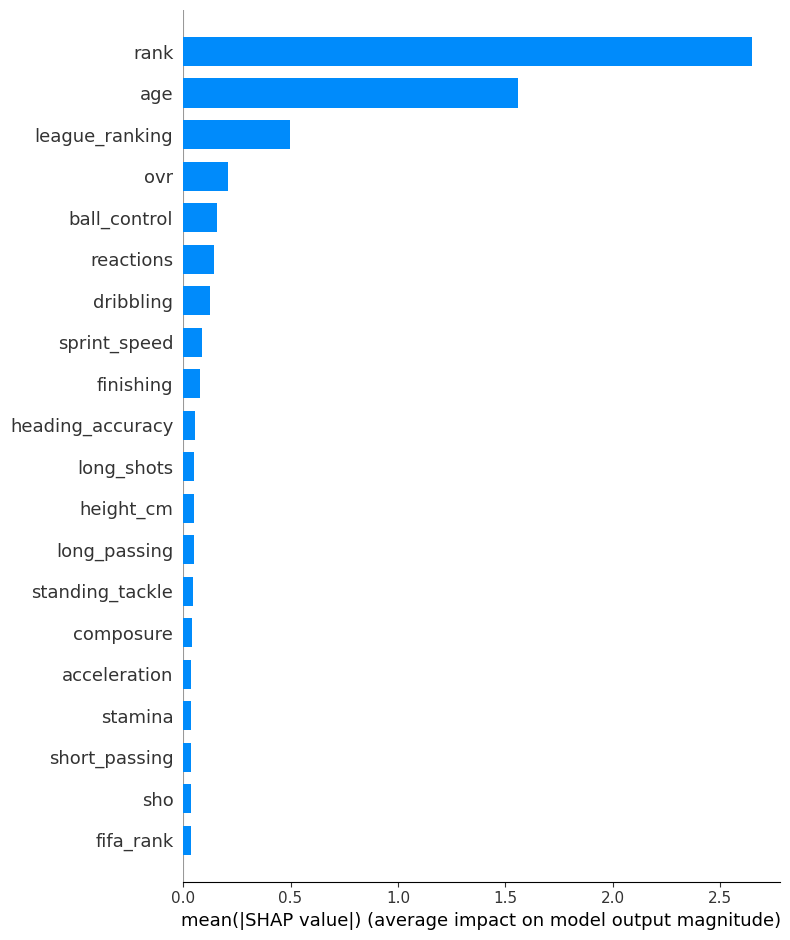

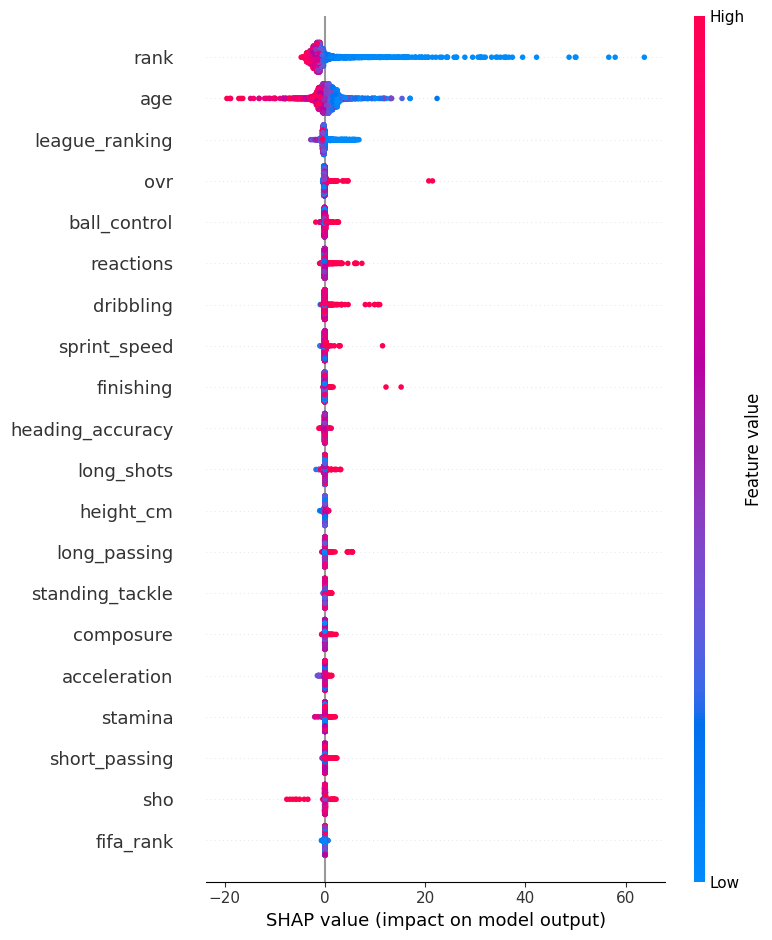

In [ ]:
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values_test = explainer.shap_values(X_test)  # 计算量 = n_samples × n_features

# —— 2. 全局重要性可视化（Bar 图）——
shap.summary_plot(
    shap_values_test, X_test,
    plot_type="bar",
    feature_names=X_test.columns,
    max_display=20)

# —— 3. 全局关系型重要性（Beeswarm）——
shap.summary_plot(
    shap_values_test, X_test,
    feature_names=X_test.columns,
    max_display=20
)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 假设你已经有以下变量：
# - df_test：包含测试集原始数据（含 market_value_million 和 position_group）
# - y_test：真实身价
# - y_pred_2：XGBoost 预测结果

df_test = df_test.copy()
df_test['pred'] = y_pred_3
df_test['residual'] = df_test['market_value_million'] - df_test['pred']

# 分组评估
position_groups = df_test['position_group'].unique()

for group in position_groups:
    sub = df_test[df_test['position_group'] == group]
    y_true = sub['market_value_million']
    y_pred = sub['pred']

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {group} - Model Performance on Test Set:")
    print(f"Samples: {len(sub)}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")


📊 Attacker - Model Performance on Test Set:
Samples: 553
RMSE: 5.3292
MAE : 1.7211
R²  : 0.8343

📊 Midfielder - Model Performance on Test Set:
Samples: 1167
RMSE: 3.7025
MAE : 1.4082
R²  : 0.8263

📊 Defender - Model Performance on Test Set:
Samples: 1039
RMSE: 2.6143
MAE : 1.0210
R²  : 0.8539

📊 Goalkeeper - Model Performance on Test Set:
Samples: 334
RMSE: 1.7195
MAE : 0.6983
R²  : 0.8432


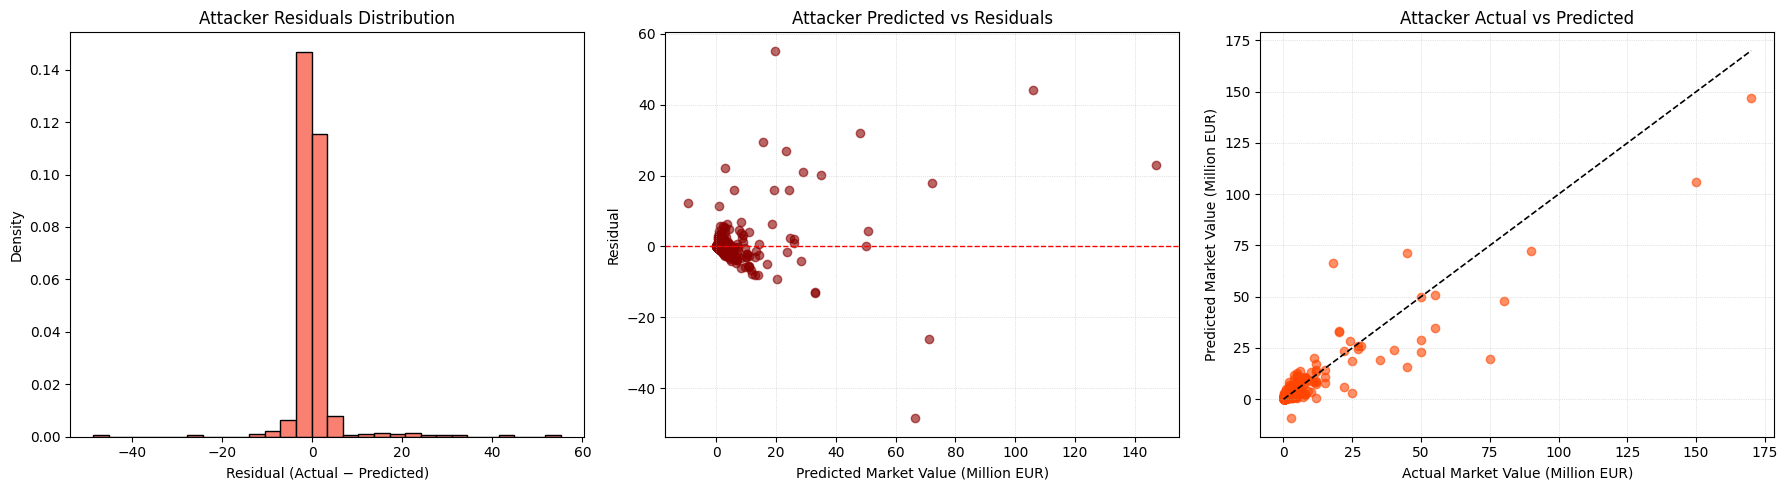

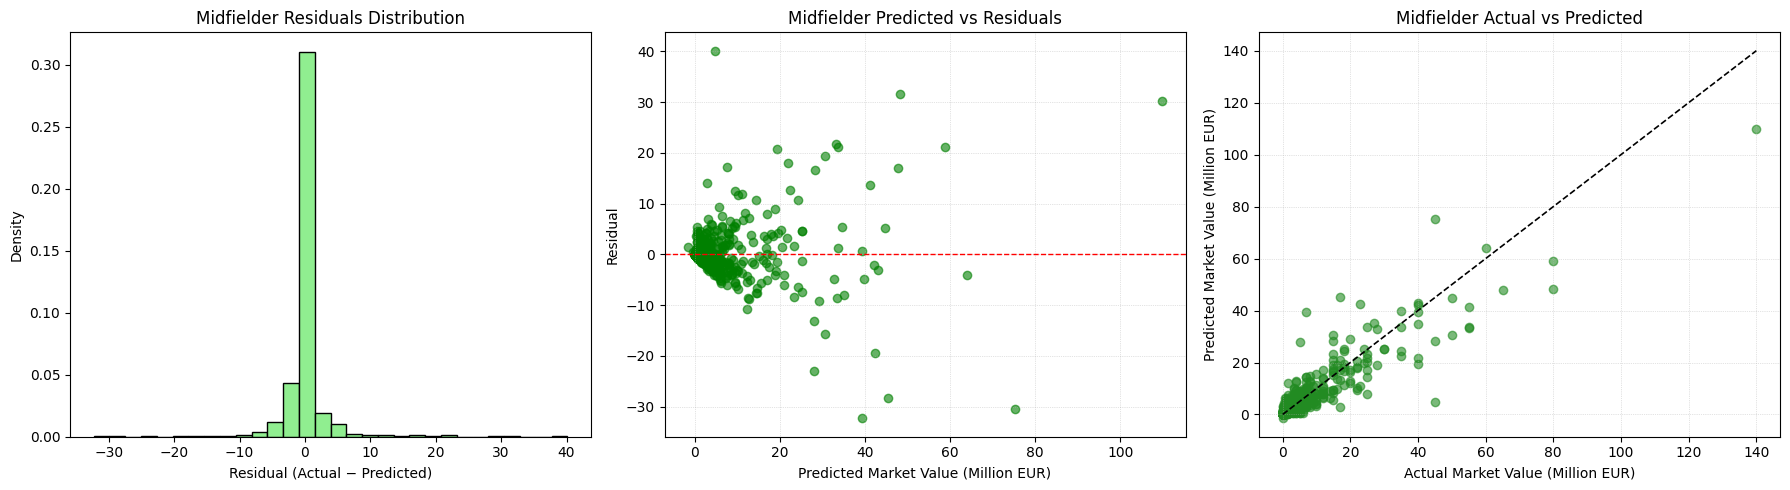

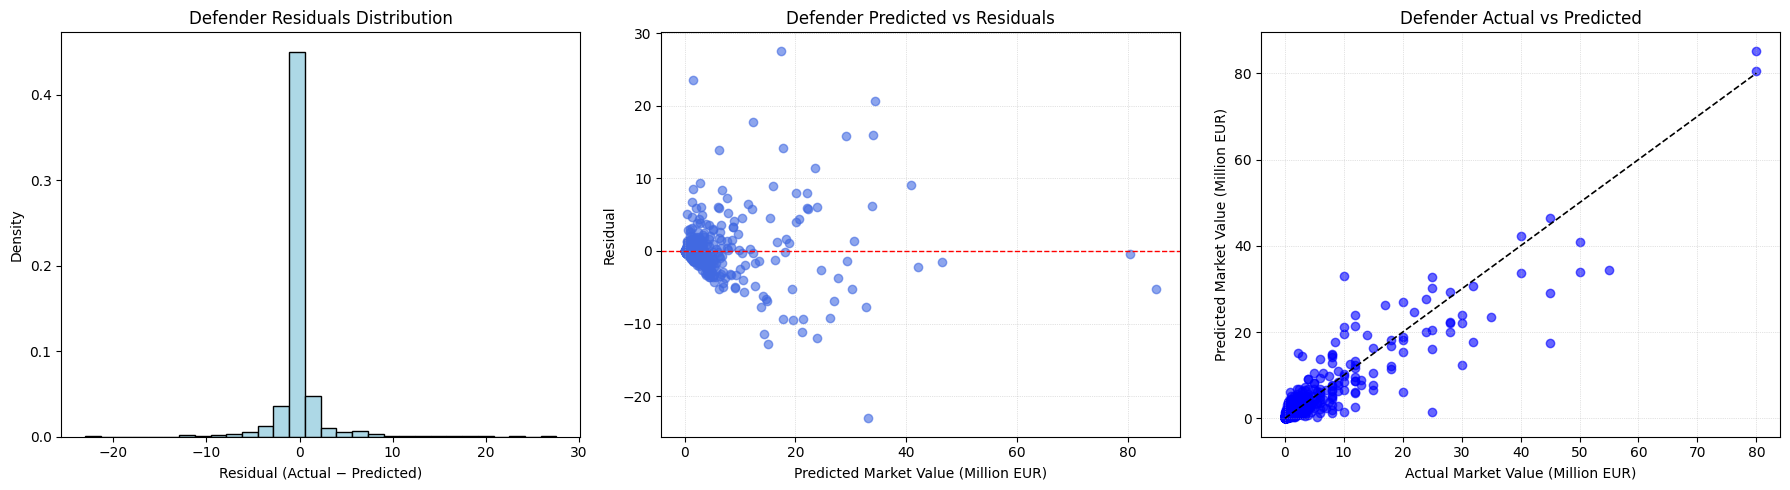

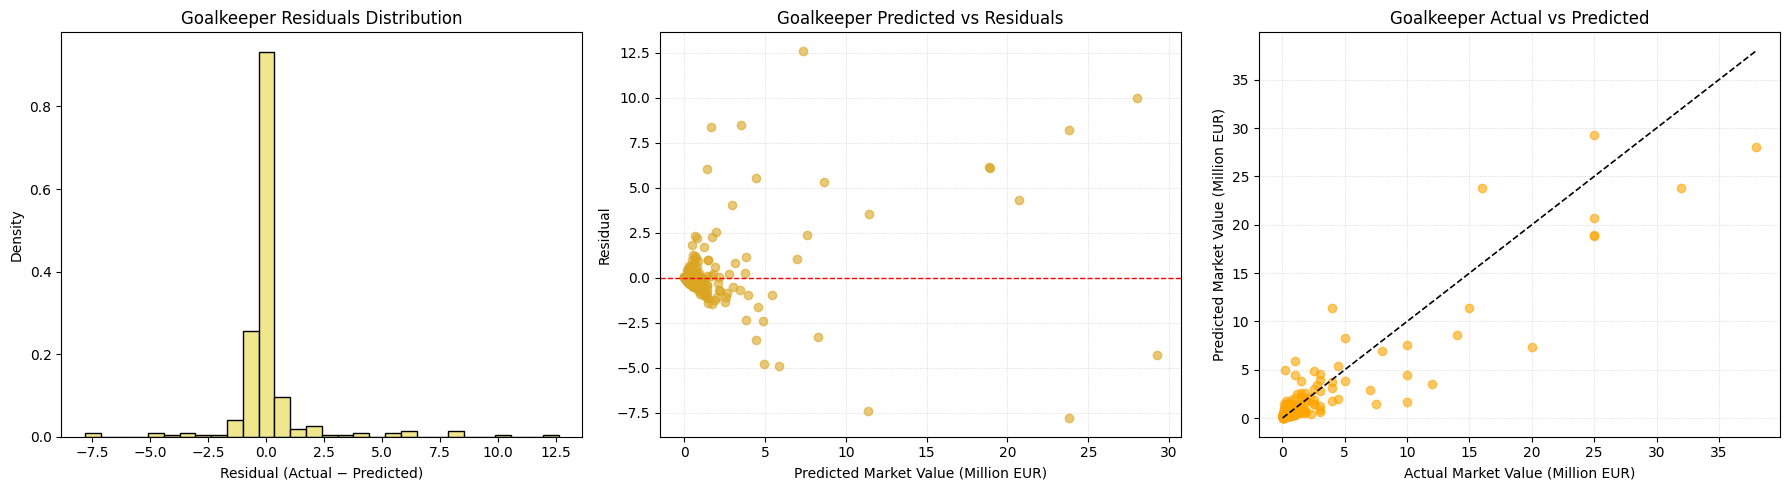

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 自定义每个位置组的配色方案
color_map = {
    'Attacker':   {'residual': 'salmon', 'scatter': 'darkred',   'actual_pred': 'orangered'},
    'Midfielder': {'residual': 'lightgreen', 'scatter': 'green', 'actual_pred': 'forestgreen'},
    'Defender':   {'residual': 'lightblue', 'scatter': 'royalblue', 'actual_pred': 'blue'},
    'Goalkeeper': {'residual': 'khaki', 'scatter': 'goldenrod', 'actual_pred': 'orange'}
}

# 添加预测列和残差列
test_df = test_df.copy()
test_df['pred']     = y_pred_3
test_df['residual'] = test_df['market_value_million'] - test_df['pred']

# 迭代每个位置绘图
positions = test_df['position_group'].unique()

for pos in positions:
    sub = test_df[test_df['position_group'] == pos]
    preds = sub['pred']
    actuals = sub['market_value_million']
    residuals = sub['residual']

    colors = color_map.get(pos, {
        'residual': 'gray', 'scatter': 'black', 'actual_pred': 'dimgray'
    })

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1) Residuals Distribution
    axes[0].hist(residuals, bins=30, density=True, color=colors['residual'], edgecolor='black')
    axes[0].set_title(f'{pos} Residuals Distribution')
    axes[0].set_xlabel('Residual (Actual − Predicted)')
    axes[0].set_ylabel('Density')

    # 2) Predicted vs Residuals
    axes[1].scatter(preds, residuals, alpha=0.6, color=colors['scatter'])
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f'{pos} Predicted vs Residuals')
    axes[1].set_xlabel('Predicted Market Value (Million EUR)')
    axes[1].set_ylabel('Residual')
    axes[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    # 3) Actual vs Predicted Scatter
    axes[2].scatter(actuals, preds, alpha=0.6, color=colors['actual_pred'])
    axes[2].plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()],
                 color='black', linestyle='--', linewidth=1.2)
    axes[2].set_title(f'{pos} Actual vs Predicted')
    axes[2].set_xlabel('Actual Market Value (Million EUR)')
    axes[2].set_ylabel('Predicted Market Value (Million EUR)')
    axes[2].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()


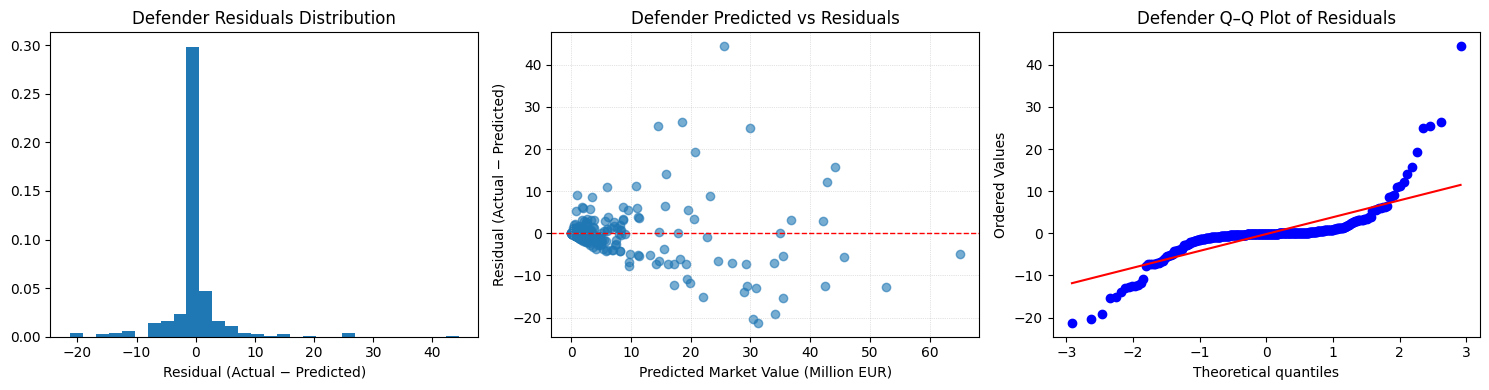

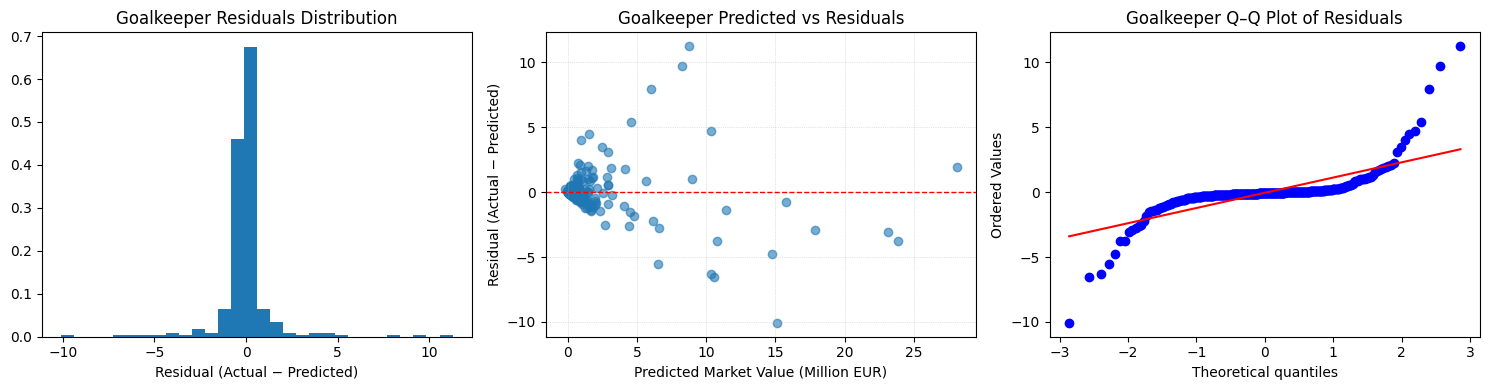

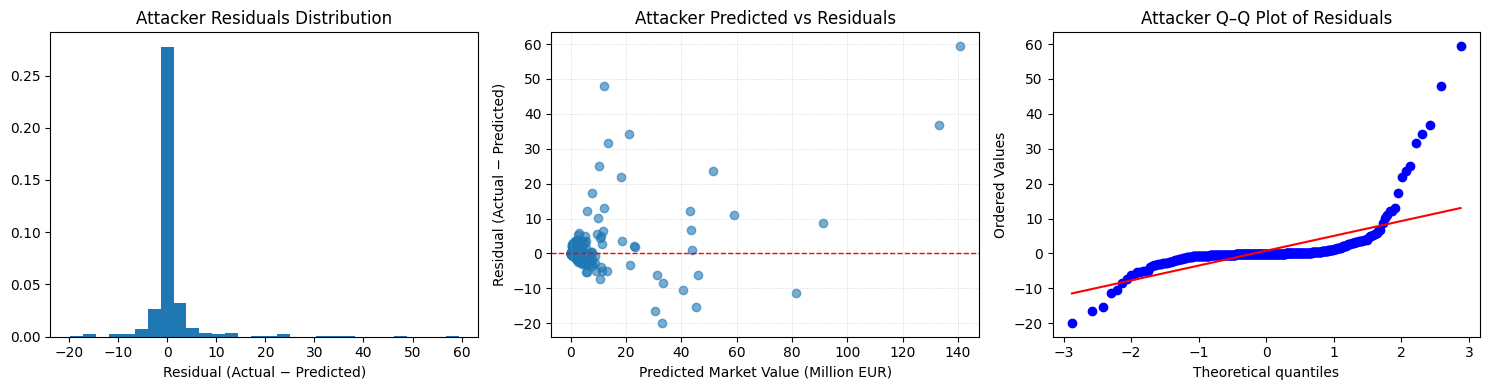

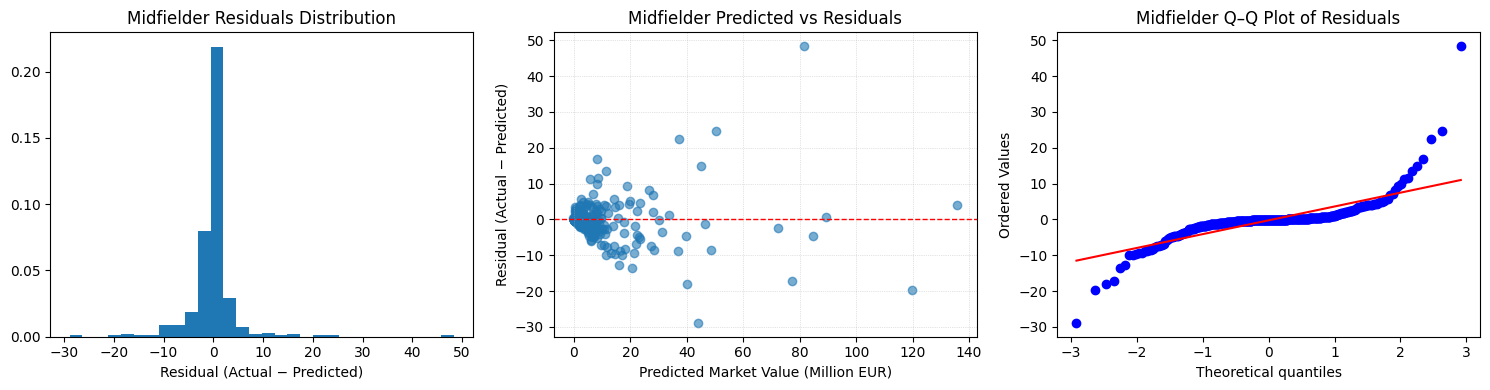

In [ ]:
# —— 1. 读取训练集 ——
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')

# —— 2. 定义排除列并构造 X_train, y_train ——
exclude = [
    'market_value_million', 'market_value_in_eur', 'position',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
    'gk_reflexes', 'position_group', 'name'
]
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_million']

# —— 3. 读取测试集并构造 X_test, y_test ——
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')
X_test = test_df.drop(columns=exclude)
# 保证列顺序一致
X_test = X_test[X_train.columns]
y_test = test_df['market_value_million']

# —— 4. 训练并预测 ——


# —— 5. 把预测和残差放到 test_df ——
test_df = test_df.copy()
test_df['pred']     = y_pred_3
test_df['residual'] = test_df['market_value_million'] - test_df['pred']

import matplotlib.pyplot as plt
from scipy import stats

# 假设 test_df 已经包含 'position', 'pred', 'residual' 列
positions = test_df['position_group'].unique()

for pos in positions:
    sub = test_df[test_df['position_group'] == pos]
    preds = sub['pred']
    residuals = sub['residual']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # 1) Residuals Distribution
    axes[0].hist(residuals, bins=30,density=True)
    axes[0].set_title(f'{pos} Residuals Distribution')
    axes[0].set_xlabel('Residual (Actual − Predicted)')

    # 2) Predicted vs Residuals
    axes[1].scatter(preds, residuals, alpha=0.6)
# 加一条水平参考线 y=0
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f'{pos} Predicted vs Residuals')
    axes[1].set_xlabel('Predicted Market Value (Million EUR)')
    axes[1].set_ylabel('Residual (Actual − Predicted)')
# 加网格，增强可读性
    axes[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    # 3) Q–Q Plot of Residuals
    stats.probplot(residuals, dist="norm", plot=axes[2])
    axes[2].set_title(f'{pos} Q–Q Plot of Residuals')

    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load test set
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_2.csv')

# 2. Prepare X_test and y_test (ensure same feature order as training)
exclude = [
    'market_value_million','position',
    'position_group'
]
X_test_full = test_df.drop(columns=exclude)
X_test_full = X_test_full[X_train.columns]  # align columns
y_test_full = test_df['market_value_million']

# 3. Define position groups
groups = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper']

# 4. Evaluate tuned Random Forest on each subset
for grp in groups:
    idx = test_df['position_group'] == grp
    X_grp = X_test_full.loc[idx]
    y_grp = y_test_full.loc[idx]

    # Predict with your tuned RF model (best_rf)
    y_pred = lgbm_tuned.predict(X_grp)

    rmse = np.sqrt(mean_squared_error(y_grp, y_pred))
    mae  = mean_absolute_error(y_grp, y_pred)
    r2   = r2_score(y_grp, y_pred)

    print(f"\n=== Tuned LightGBM Test for {grp} ===")
    print(f"Samples: {len(y_grp)}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")



=== Tuned LightGBM Test for Attacker ===
Samples: 553
RMSE: 5.3292
MAE : 1.7211
R²  : 0.8343

=== Tuned LightGBM Test for Midfielder ===
Samples: 1167
RMSE: 3.7025
MAE : 1.4082
R²  : 0.8263

=== Tuned LightGBM Test for Defender ===
Samples: 1039
RMSE: 2.6143
MAE : 1.0210
R²  : 0.8539

=== Tuned LightGBM Test for Goalkeeper ===
Samples: 334
RMSE: 1.7195
MAE : 0.6983
R²  : 0.8432
